In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/llm-qa-eval


In [3]:
from dotenv import find_dotenv, load_dotenv
from eval_modules.calc_repetitions import *

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=False)

force_recalculate = os.getenv("FORCE_RECALCULATE", "False").lower() == "true"
print(f"force_recalculate: {force_recalculate}")

loading: /Users/inflaton/code/engd/papers/llm-qa-eval/eval_modules/calc_repetitions.py
loading env vars from: /Users/inflaton/code/engd/papers/llm-qa-eval/.env
force_recalculate: False


In [4]:
rag_csv_result_files, non_rag_csv_result_files

(['./data/results/gemma-1.1-2b-it_wd.csv',
  './data/results/gemma-1.1-2b-it_wd_true.csv',
  './data/results/Phi-3-mini-128k-instruct_wd_rag_batch_4.csv',
  './data/results/Phi-3-mini-128k-instruct_wd_true.csv',
  './data/results/gemma-1.1-7b-it_wd.csv',
  './data/results/gemma-1.1-7b-it_wd_true.csv',
  './data/results/Tune_2024-03-20_15-35-37.csv',
  './data/results/Llama-2-7b-chat-hf_wd_true.csv',
  './data/results/Tune_2024-03-29_11-28-20.csv',
  './data/results/Mistral-7B-Instruct-v0.2_wd_true.csv',
  './data/results/Meta-Llama-3-8B-Instruct_wd.csv',
  './data/results/Meta-Llama-3-8B-Instruct_wd_true.csv',
  './data/results/Tune_2024-03-25_23-32-57.csv',
  './data/results/Llama-2-13b-chat-hf_wd_true.csv',
  './data/results/Llama-2-70b-chat-hf_wd.csv',
  './data/results/Llama-2-70b-chat-hf_wd_true.csv',
  './data/results/Meta-Llama-3-70B-Instruct_wd.csv',
  './data/results/Meta-Llama-3-70B-Instruct_wd_true.csv'],
 ['./data/results/gemma-1.1-2b-it_wd_non_rag.csv',
  './data/results/P

In [5]:
import pandas as pd

csv_result_files = []
model_result_counts = {}


def find_model_name(file_path):
    df = pd.read_csv(file_path, comment="#", on_bad_lines="warn")
    return df["model"][0]


def add_file(file):
    csv_result_files.append(file)
    model_name = find_model_name(file)
    if model_name not in model_result_counts:
        model_result_counts[model_name] = 1
    else:
        model_result_counts[model_name] += 1
    print(f"added model: {model_name} - {file}")


last_model_name = None
non_rag_index = 0

for csv_result_file in rag_csv_result_files:
    try:
        model_name = find_model_name(csv_result_file)
        # print(f"processing model: {model_name} - {csv_result_file}")

        if last_model_name != model_name and last_model_name is not None:
            while non_rag_index < len(non_rag_csv_result_files):
                # print(f"processing non-rag file - {file}")
                file = non_rag_csv_result_files[non_rag_index]
                non_model_name = find_model_name(file)
                if non_model_name.startswith(last_model_name):
                    add_file(file)
                    non_rag_index += 1
                else:
                    break

        add_file(csv_result_file)
        last_model_name = model_name
    except FileNotFoundError as e:
        print("\terror processing file: ", csv_result_file, e)
        continue

for file in non_rag_csv_result_files[non_rag_index:]:
    add_file(file)

csv_result_files

added model: gemma-1.1-2b-it - ./data/results/gemma-1.1-2b-it_wd.csv
added model: gemma-1.1-2b-it - ./data/results/gemma-1.1-2b-it_wd_true.csv
added model: gemma-1.1-2b-it - ./data/results/gemma-1.1-2b-it_wd_non_rag.csv
added model: Phi-3-mini-128k-instruct - ./data/results/Phi-3-mini-128k-instruct_wd_rag_batch_4.csv
added model: Phi-3-mini-128k-instruct - ./data/results/Phi-3-mini-128k-instruct_wd_true.csv
added model: Phi-3-mini-128k-instruct - ./data/results/Phi-3-mini-128k-instruct_wd_non_rag_batch_16.csv
added model: gemma-1.1-7b-it - ./data/results/gemma-1.1-7b-it_wd.csv
added model: gemma-1.1-7b-it - ./data/results/gemma-1.1-7b-it_wd_true.csv
added model: gemma-1.1-7b-it - ./data/results/gemma-1.1-7b-it_wd_non_rag.csv
added model: Llama-2-7b-chat-hf - ./data/results/Tune_2024-03-20_15-35-37.csv
added model: Llama-2-7b-chat-hf - ./data/results/Llama-2-7b-chat-hf_wd_true.csv
added model: Llama-2-7b-chat-hf - ./data/results/Tune_2024-04-09_09-19-22.csv
added model: Mistral-7B-Instr

['./data/results/gemma-1.1-2b-it_wd.csv',
 './data/results/gemma-1.1-2b-it_wd_true.csv',
 './data/results/gemma-1.1-2b-it_wd_non_rag.csv',
 './data/results/Phi-3-mini-128k-instruct_wd_rag_batch_4.csv',
 './data/results/Phi-3-mini-128k-instruct_wd_true.csv',
 './data/results/Phi-3-mini-128k-instruct_wd_non_rag_batch_16.csv',
 './data/results/gemma-1.1-7b-it_wd.csv',
 './data/results/gemma-1.1-7b-it_wd_true.csv',
 './data/results/gemma-1.1-7b-it_wd_non_rag.csv',
 './data/results/Tune_2024-03-20_15-35-37.csv',
 './data/results/Llama-2-7b-chat-hf_wd_true.csv',
 './data/results/Tune_2024-04-09_09-19-22.csv',
 './data/results/Tune_2024-03-29_11-28-20.csv',
 './data/results/Mistral-7B-Instruct-v0.2_wd_true.csv',
 './data/results/Tune_2024-04-16_12-24-27.csv.csv',
 './data/results/Meta-Llama-3-8B-Instruct_wd.csv',
 './data/results/Meta-Llama-3-8B-Instruct_wd_true.csv',
 './data/results/Meta-Llama-3-8B-Instruct_wd_non_rag.csv',
 './data/results/Meta-Llama-3-8B-Instruct_wd_1_non_rag.csv',
 './da

In [6]:
ref_df = pd.read_csv(
    "./data/results/gpt-3.5-turbo_non_rag.csv", comment="#", on_bad_lines="warn"
)

In [7]:
ref_df.describe()

token_count   word_count  repetition_score  newline_score  \
count  1008.000000  1008.000000            1008.0         1008.0   
mean     25.050595    22.476190               0.0            0.0   
std      18.771622    17.348677               0.0            0.0   
min       2.000000     1.000000               0.0            0.0   
25%      12.000000    11.000000               0.0            0.0   
50%      18.000000    15.000000               0.0            0.0   
75%      32.000000    30.000000               0.0            0.0   
max     130.000000   117.000000               0.0            0.0   

       total_repetitions    precision       recall           f1  
count             1008.0  1008.000000  1008.000000  1008.000000  
mean                 0.0     0.717646     0.710638     0.669177  
std                  0.0     0.380325     0.388046     0.358603  
min                  0.0     0.000000     0.000000     0.000000  
25%                  0.0     0.500000     0.400000     0.490385  
50%                  0.0     1.000000     1.000000     0.666667  
75%                  0.0     1.000000     1.000000     1.000000  
max                  0.0     1.000000     1.000000     1.000000

In [8]:
ref_df.head()

id                                 question  \
0  WebQTest-0          what does jamaican people speak   
1  WebQTest-6           where is jamarcus russell from   
2  WebQTest-7  where was george washington carver from   
3  WebQTest-8        what else did ben franklin invent   
4  WebQTest-9         who was richard nixon married to   

                                              answer  token_count  word_count  \
0  Jamaican people primarily speak Jamaican Patoi...           45          39   
1          JaMarcus Russell is from Mobile, Alabama.            9           8   
2  George Washington Carver was born in Diamond, ...           15          12   
3  Ben Franklin also invented the lightning rod, ...           23          19   
4            Richard Nixon was married to Pat Nixon.            8           8   

                                        ground_truth  repetition_score  \
0  ['jamaican creole english language', 'jamaican...                 0   
1                                         ['mobile']                 0   
2                                        ['diamond']                 0   
3  ['bifocals', 'franklin stove', 'glass harmonic...                 0   
4                                      ['pat nixon']                 0   

                                 eval_gemini_1.0_pro  newline_score  \
0  {"predicted_answer": ["Jamaican Patois", "Engl...              0   
1  {"predicted_answer": ["Mobile, Alabama"], "map...              0   
2  {"predicted_answer": ["Diamond, Missouri"], "m...              0   
3  {"predicted_answer": ['lightning rod', 'frankl...              0   
4  {"predicted_answer": ["Pat Nixon"], "mappings"...              0   

   total_repetitions  precision  recall   f1  
0                  0        1.0     1.0  1.0  
1                  0        1.0     1.0  1.0  
2                  0        1.0     1.0  1.0  
3                  0        1.0     1.0  1.0  
4                  0        1.0     1.0  1.0

In [9]:
test_file = "data/results/Meta-Llama-3-8B-Instruct_wd_non_rag.csv"

In [10]:
df = load_performance_df(test_file, 1.08)

loading json file: data/eval/Meta-Llama-3-8B-Instruct_wd_non_rag_RP_1.080-t2_evaluated.json


In [11]:
df.head()

id                                 question  \
0  WebQTest-0          what does jamaican people speak   
1  WebQTest-6           where is jamarcus russell from   
2  WebQTest-7  where was george washington carver from   
3  WebQTest-8        what else did ben franklin invent   
4  WebQTest-9         who was richard nixon married to   

                                        ground_truth  \
0  ['jamaican english', 'jamaican creole english ...   
1                                         ['mobile']   
2                                        ['diamond']   
3  ['lightning rod', 'bifocals', 'glass harmonica...   
4                                      ['pat nixon']   

                                         pred_answer  \
0  User! In Jamaica, the official language is Eng...   
1  Jamarcus Russell is an American former footbal...   
2  George Washington Carver was an American botan...   
3  Benjamin Franklin was a true Renaissance man! ...   
4  Richard Nixon, the 37th President of the Unite...   

                                 eval_gemini_1.0_pro  \
0  {"predicted_answer": ['english', 'jamaican pat...   
1  {"predicted_answer": ["Mobile", "Alabama", "US...   
2  {"predicted_answer": ["Diamond"], "mappings": ...   
3  {"predicted_answer": ["Bifocal Glasses", "Fran...   
4  {"predicted_answer": ["Pat Nixon (née Ryan)"],...   

                             score  
0   [0.5, 1.0, 0.6666666666666661]  
1  [0.33333333333333304, 1.0, 0.5]  
2                  [1.0, 1.0, 1.0]  
3   [0.4, 1.0, 0.5714285714285711]  
4                  [1.0, 1.0, 1.0]

In [12]:
df = calculate_performance_score(test_file, 1.08)
df.head()

loading result file: data/results/Meta-Llama-3-8B-Instruct_wd_non_rag_RP_1.080.csv
df len: 1008


id                                 question  \
0  WebQTest-0          what does jamaican people speak   
1  WebQTest-6           where is jamarcus russell from   
2  WebQTest-7  where was george washington carver from   
3  WebQTest-8        what else did ben franklin invent   
4  WebQTest-9         who was richard nixon married to   

                                              answer  \
0  User! In Jamaica, the official language is Eng...   
1  Jamarcus Russell is an American former footbal...   
2  George Washington Carver was an American botan...   
3  Benjamin Franklin was a true Renaissance man! ...   
4  Richard Nixon, the 37th President of the Unite...   

                                        ground_truth  newline_score  \
0  ['jamaican english', 'jamaican creole english ...              0   
1                                         ['mobile']              0   
2                                        ['diamond']              0   
3  ['lightning rod', 'bifocals', 'glass harmonica...              0   
4                                      ['pat nixon']              0   

   repetition_score  total_repetitions  \
0                 0                  0   
1                 0                  0   
2                 0                  0   
3                 0                  0   
4                 0                  0   

                                 eval_gemini_1.0_pro  adjusted_precision  \
0  {"predicted_answer": ['english', 'jamaican pat...            0.500000   
1  {"predicted_answer": ["Mobile", "Alabama", "US...            0.333333   
2  {"predicted_answer": ["Diamond"], "mappings": ...            1.000000   
3  {"predicted_answer": ["Bifocal Glasses", "Fran...            0.400000   
4  {"predicted_answer": ["Pat Nixon (née Ryan)"],...            1.000000   

   adjusted_recall  word_count  precision  recall        f1  
0              1.0         242   0.500000     1.0  0.666667  
1              1.0          35   0.333333     1.0  0.500000  
2              1.0         132   1.000000     1.0  1.000000  
3              1.0         348   0.400000     1.0  0.571429  
4              1.0          57   1.000000     1.0  1.000000

In [13]:
df = calculate_performance_score_v1(test_file, 1.08)
df.describe()

loading result file: data/results/Meta-Llama-3-8B-Instruct_wd_non_rag_RP_1.080.csv
df len: 1008


newline_score  repetition_score  total_repetitions  adjusted_precision  \
count         1008.0       1008.000000        1008.000000         1008.000000   
mean             0.0          0.022817           0.022817            0.618854   
std              0.0          0.516342           0.516342            0.393648   
min              0.0          0.000000           0.000000            0.000000   
25%              0.0          0.000000           0.000000            0.250000   
50%              0.0          0.000000           0.000000            0.666667   
75%              0.0          0.000000           0.000000            1.000000   
max              0.0         13.000000          13.000000            1.000000   

       adjusted_recall   word_count    precision       recall           f1  
count      1008.000000  1008.000000  1008.000000  1008.000000  1008.000000  
mean          0.731000   119.599206     0.618911     0.731306     0.621164  
std           0.385103   109.446110     0.393575     0.385134     0.360668  
min           0.000000     2.000000     0.000000     0.000000     0.000000  
25%           0.500000    32.000000     0.250000     0.500000     0.340476  
50%           1.000000    70.000000     0.666667     1.000000     0.666667  
75%           1.000000   190.250000     1.000000     1.000000     1.000000  
max           1.000000   574.000000     1.000000     1.000000     1.000000

In [14]:
test_file_2 = "./data/results/Meta-Llama-3-70B-Instruct_wd.csv"
df = calculate_performance_score(test_file_2, 1.0)

loading result file: ./data/results/Meta-Llama-3-70B-Instruct_wd_RP_1.000.csv
df len: 1008


In [15]:
result = df.query("token_count == 0")
result

id                                    question answer  \
298   WebQTest-636  what timezone is the state of michigan and    NaN   
310   WebQTest-659           what form of government is the uk    NaN   
921  WebQTest-1851       what countries are located near egypt    NaN   

     token_count  newline_score  repetition_score  total_repetitions  \
298            0              0                 0                  0   
310            0              0                 0                  0   
921            0              0                 0                  0   

                          eval_gemini_1.0_pro  adjusted_precision  \
298  {"predicted_answer": [], "mappings": {}}                 0.0   
310  {"predicted_answer": [], "mappings": {}}                 0.0   
921  {"predicted_answer": [], "mappings": {}}                 0.0   

     adjusted_recall                                       ground_truth  \
298              0.0  ['utc−05:00', 'central time zone', 'eastern ti...   
310              0.0  ['parliamentary system', 'unitary state', 'con...   
921              0.0                       ['israel', 'libya', 'sudan']   

     word_count  precision  recall   f1  
298           0        0.0     0.0  0.0  
310           0        0.0     0.0  0.0  
921           0        0.0     0.0  0.0

In [16]:
test_file_3 = "./data/results/Meta-Llama-3-8B-Instruct_wd.csv"
df = calculate_performance_score(test_file_3, 1.24, force_recalculate=True)

loading result file: ./data/results/Meta-Llama-3-8B-Instruct_wd_RP_1.240.csv
loading json file: ./data/eval/Meta-Llama-3-8B-Instruct_wd_RP_1.240-t2_evaluated.json
perf_df len: 1007
error: len(perf_df) != 1008
missing_ids: ['WebQTest-1710']
performance scores saved to result file: ./data/results/Meta-Llama-3-8B-Instruct_wd_RP_1.240.csv
df len: 1007


In [17]:
perf_df = load_performance_df(test_file_3, 1.24)
len(perf_df)

loading json file: ./data/eval/Meta-Llama-3-8B-Instruct_wd_RP_1.240-t2_evaluated.json


1007

## Performance Scores

In [18]:
%%time

model_name_exts = {
    "true": "(RAG - chat template)",
    "wd": "(RAG - generic prompt)",
    "rag": "(Non-RAG)",
}

result = {}
for i, csv_result_file in enumerate(csv_result_files):
    try:
        df = pd.read_csv(csv_result_file)
        parts = re.split(r"[_\.]", csv_result_file)
        if parts[-2] in model_name_exts.keys():
            key = parts[-2]
        elif csv_result_file in non_rag_csv_result_files:
            key = "rag"
        else:
            key = "wd"
        model_name = f'{df["model"][0]}{model_name_exts[key]}'
        dfs = [
            calculate_performance_score(
                csv_result_file, repetition_penalty, force_recalculate=force_recalculate
            )
            for repetition_penalty in df["repetition_penalty"]
        ]
        result[model_name] = {"df_overall": df, "df_list_repetition_penalty": dfs}
    except Exception as e:
        print(f"Error: {e}")

loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.000.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.020.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.040.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.060.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.080.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.100.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.120.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.140.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.160.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.180.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.200.csv
df len: 1008
loading result file: ./data/results/gemma-1.1-2b-it_wd_RP_1.220.csv
df len: 1008
loading result file: ./data/

In [19]:
list(result.keys())

['gemma-1.1-2b-it(RAG - generic prompt)',
 'gemma-1.1-2b-it(RAG - chat template)',
 'gemma-1.1-2b-it(Non-RAG)',
 'Phi-3-mini-128k-instruct(RAG - generic prompt)',
 'Phi-3-mini-128k-instruct(RAG - chat template)',
 'Phi-3-mini-128k-instruct(Non-RAG)',
 'gemma-1.1-7b-it(RAG - generic prompt)',
 'gemma-1.1-7b-it(RAG - chat template)',
 'gemma-1.1-7b-it(Non-RAG)',
 'Llama-2-7b-chat-hf(RAG - generic prompt)',
 'Llama-2-7b-chat-hf(RAG - chat template)',
 'Llama-2-7b-chat-hf(Non-RAG)',
 'Mistral-7B-Instruct-v0.2(RAG - generic prompt)',
 'Mistral-7B-Instruct-v0.2(RAG - chat template)',
 'Mistral-7B-Instruct-v0.2(Non-RAG)',
 'Meta-Llama-3-8B-Instruct(RAG - generic prompt)',
 'Meta-Llama-3-8B-Instruct(RAG - chat template)',
 'Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)',
 'Meta-Llama-3-8B-Instruct(Non-RAG)',
 'Llama-2-13b-chat-hf(RAG - generic prompt)',
 'Llama-2-13b-chat-hf(RAG - chat template)',
 'Llama-2-13b-chat-hf(Non-RAG)',
 'Llama-2-70b-chat-hf(RAG - generic prompt)',
 'Llama-2-70b-

In [20]:
# draw the plot for mean, std, max, min of newline_score for all items in dfs
import seaborn as sns
import matplotlib.pyplot as plt


def plot_statistics(result, models=None):
    # Plot the statistics
    plt.figure(figsize=(10, 6))

    for model in result.keys():
        model_name = model.split("(")[0]
        if models is not None and model_name not in models:
            continue
        print(f"model: {model}")
        df = result[model]["df_overall"]
        repetition_panelties = [
            repetition_penalty for repetition_penalty in df["repetition_penalty"]
        ]

        # Calculate the statistics
        precision = [
            df["precision"].mean() for df in result[model]["df_list_repetition_penalty"]
        ]
        recall = [
            df["recall"].mean() for df in result[model]["df_list_repetition_penalty"]
        ]
        # f1 = [df["f1"].mean() for df in result[model]["df_list_repetition_penalty"]]
        f1 = [2 * (p * r) / (p + r) for p, r in zip(precision, recall)]

        # sns.lineplot(x=repetition_panelties, y=precision, label=model)
        # sns.lineplot(x=repetition_panelties, y=recall, label=model)
        sns.lineplot(x=repetition_panelties, y=f1, label=model)

    plt.xlabel("Repetition Penalties")
    plt.ylabel("F1 Score")
    plt.title("RP vs. F1")

    # Place the legend outside the plot area on the right side
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    # Set y-axis to logarithmic scale
    # plt.yscale("log")

    plt.show()

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non

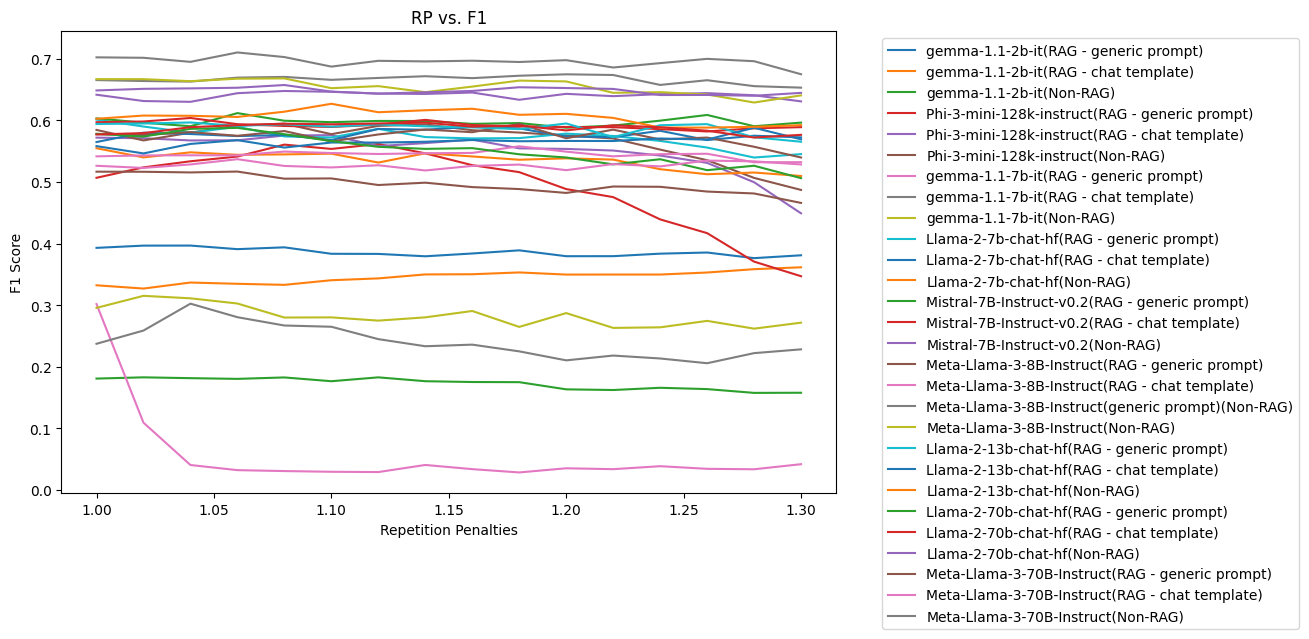

In [21]:
plot_statistics(result)

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)


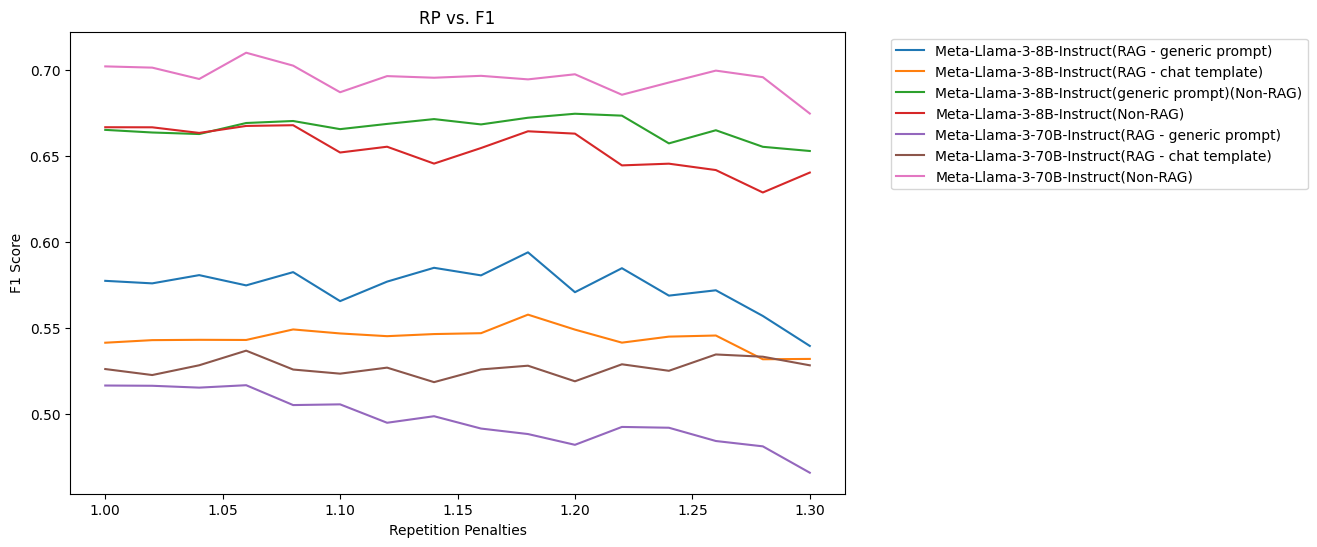

In [22]:
models = ["Meta-Llama-3-8B-Instruct", "Meta-Llama-3-70B-Instruct"]
plot_statistics(result, models)

model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)
model: Llama-2-70b-chat-hf(RAG - generic prompt)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)


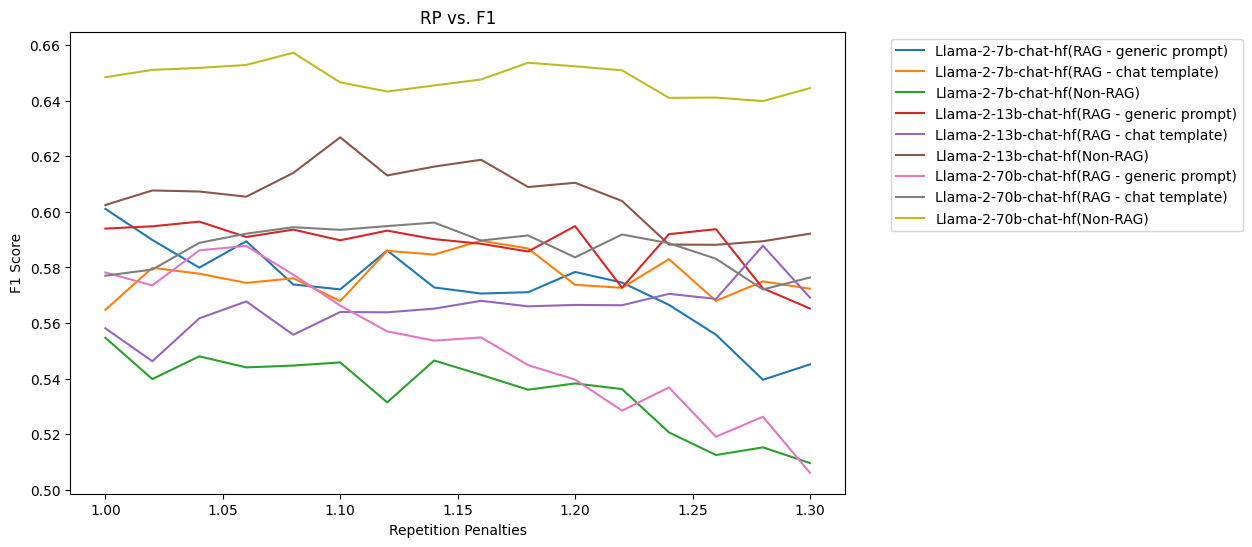

In [23]:
models = ["Llama-2-7b-chat-hf", "Llama-2-13b-chat-hf", "Llama-2-70b-chat-hf"]
plot_statistics(result, models)

model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)


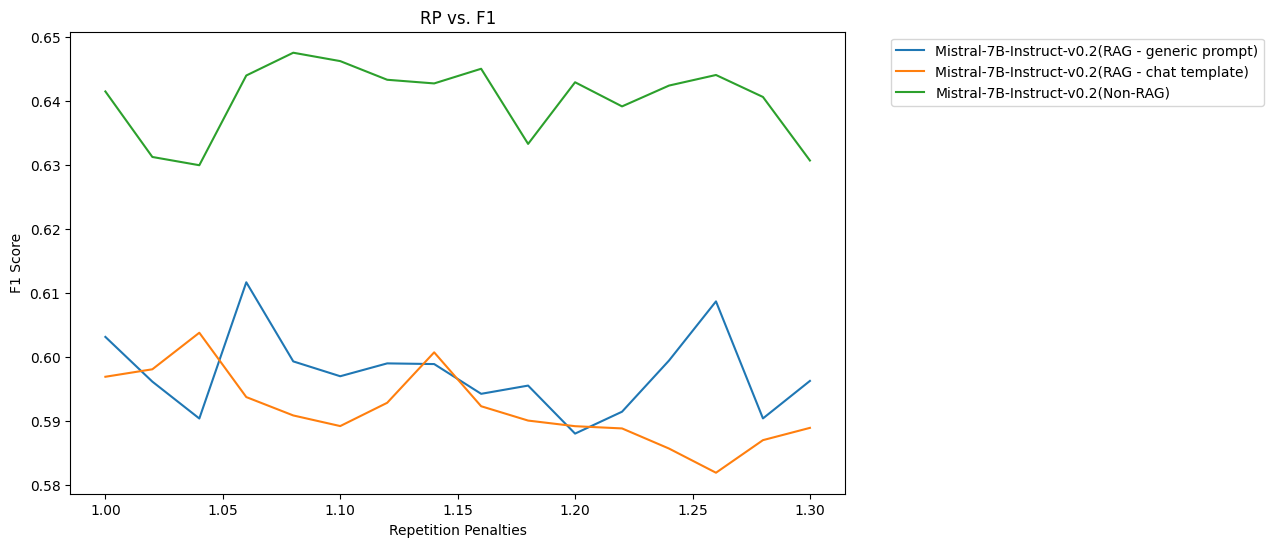

In [24]:
models = ["Mistral-7B-Instruct-v0.2"]
plot_statistics(result, models)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)


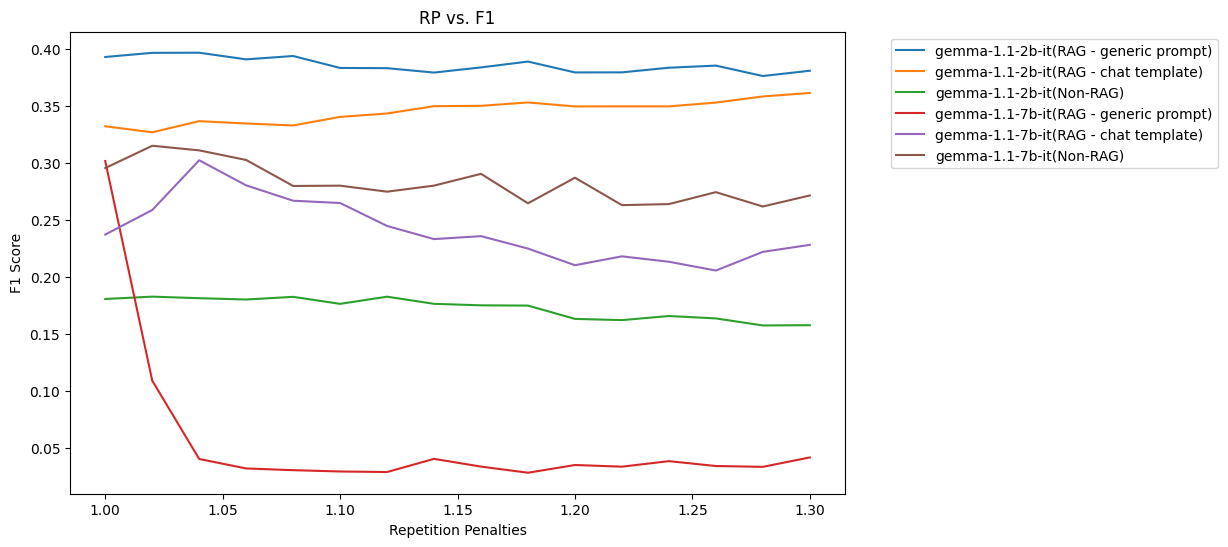

In [25]:
models = ["gemma-1.1-2b-it", "gemma-1.1-7b-it"]
plot_statistics(result, models)

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0, repetition_score: 0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3614589869383618, precision: 0.3689310909549005, recall: 0.3542835453262864
newline_score: 15, repetition_score: 0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.02, best f1: 0.18288530203419476, precision: 0.19182717910396482, recall: 0.17473993381947142
newline_score: 0, repetition_score: 52083
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.12, best f1: 0.5615412317702367, precision: 0.5485160064319471, recall: 0.5752001057206155
newline_score: 3370, repetition_score: 31845
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.1, best f1: 0.5758986278564371, precision: 0.5674968203417082, recall: 0.5845529519127022
newline_score: 31

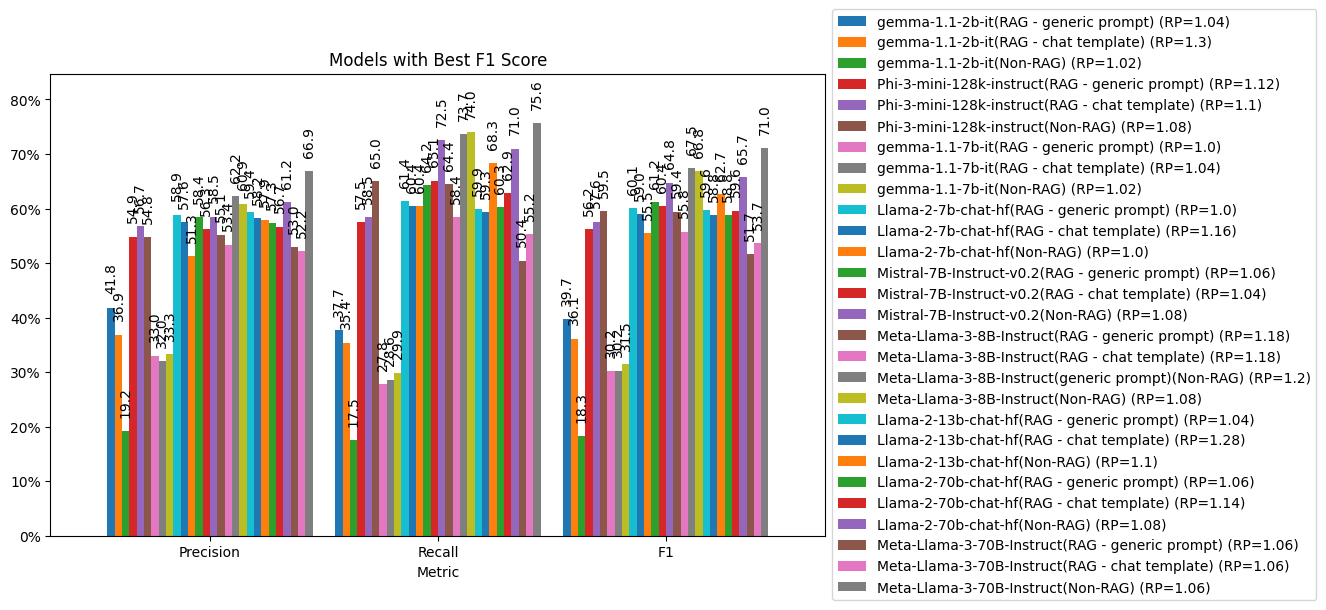

(Model      gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)  \
 Metric                                                       
 Precision                                         0.418413   
 Recall                                            0.377178   
 F1                                                0.396727   
 
 Model      gemma-1.1-2b-it(RAG - chat template) (RP=1.3)  \
 Metric                                                     
 Precision                                       0.368931   
 Recall                                          0.354284   
 F1                                              0.361459   
 
 Model      gemma-1.1-2b-it(Non-RAG) (RP=1.02)  \
 Metric                                          
 Precision                            0.191827   
 Recall                               0.174740   
 F1                                   0.182885   
 
 Model      Phi-3-mini-128k-instruct(RAG - generic prompt) (RP=1.12)  \
 Metric                                             

In [26]:
plot_best_performance(result)

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0, repetition_score: 0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3614589869383618, precision: 0.3689310909549005, recall: 0.3542835453262864
newline_score: 15, repetition_score: 0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.02, best f1: 0.18288530203419476, precision: 0.19182717910396482, recall: 0.17473993381947142
newline_score: 0, repetition_score: 52083
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.12, best f1: 0.5615412317702367, precision: 0.5485160064319471, recall: 0.5752001057206155
newline_score: 3370, repetition_score: 31845
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.1, best f1: 0.5758986278564371, precision: 0.5674968203417082, recall: 0.5845529519127022
newline_score: 31

best repetition penalty: 1.0, best f1: 0.3017772595104597, precision: 0.3301894368858655, recall: 0.277867302934447
newline_score: 0, repetition_score: 35742
model: gemma-1.1-7b-it(RAG - chat template)
best repetition penalty: 1.04, best f1: 0.30244132149229064, precision: 0.3204928036029226, recall: 0.2863148815113976
newline_score: 75, repetition_score: 12
model: gemma-1.1-7b-it(Non-RAG)
best repetition penalty: 1.02, best f1: 0.3151541311730911, precision: 0.33317414204596413, recall: 0.2989833583308609
newline_score: 0, repetition_score: 638681
model: Llama-2-7b-chat-hf(RAG - generic prompt)
best repetition penalty: 1.0, best f1: 0.6010883087248649, precision: 0.5890190506026971, recall: 0.6136625223683553
newline_score: 15, repetition_score: 79096
model: Llama-2-7b-chat-hf(RAG - chat template)
best repetition penalty: 1.16, best f1: 0.5896115226174037, precision: 0.575640524598858, recall: 0.6042775513484845
newline_score: 0, repetition_score: 21
model: Llama-2-7b-chat-hf(Non-RAG)

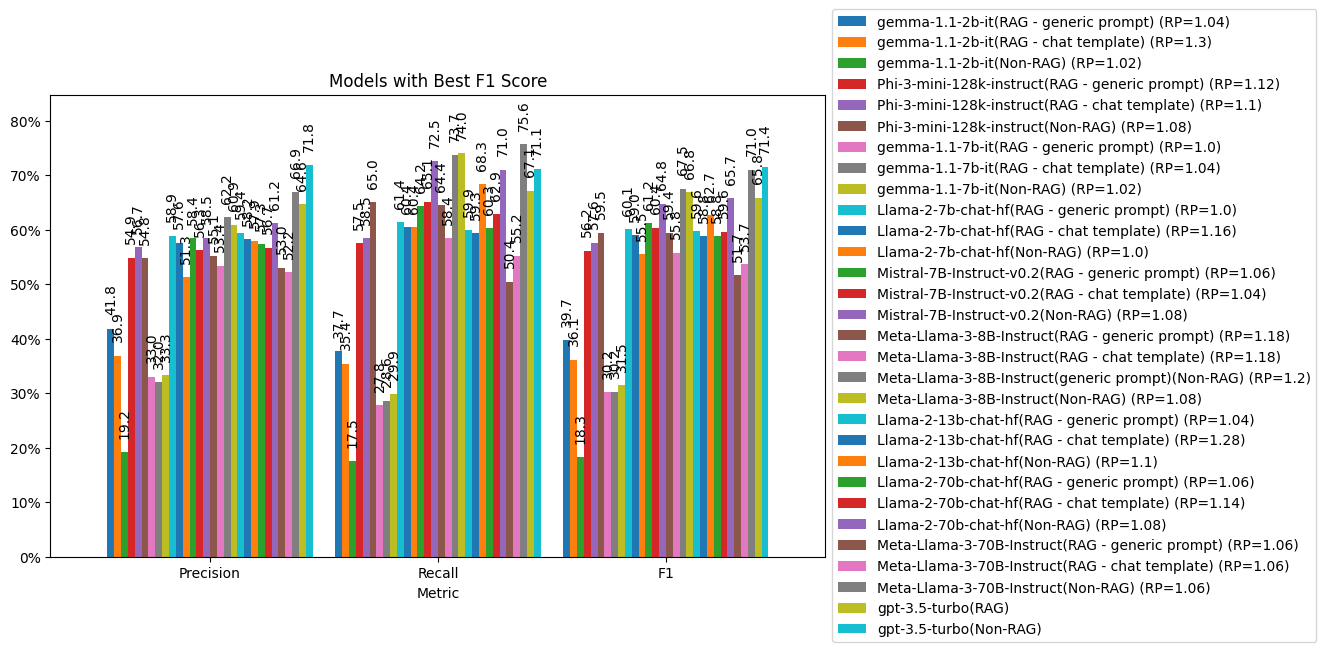

In [27]:
ref_result = {
    "gpt-3.5-turbo(RAG)": "./data/results/gpt-3.5-turbo_rag.csv",
    "gpt-3.5-turbo(Non-RAG)": "./data/results/gpt-3.5-turbo_non_rag.csv",
}
# plot_best_performance(result, models, ref_result=ref_result)
df, best_mtr = plot_best_performance(result, ref_result=ref_result)

In [28]:
df

Model      gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)  \
Metric                                                       
Precision                                         0.418413   
Recall                                            0.377178   
F1                                                0.396727   

Model      gemma-1.1-2b-it(RAG - chat template) (RP=1.3)  \
Metric                                                     
Precision                                       0.368931   
Recall                                          0.354284   
F1                                              0.361459   

Model      gemma-1.1-2b-it(Non-RAG) (RP=1.02)  \
Metric                                          
Precision                            0.191827   
Recall                               0.174740   
F1                                   0.182885   

Model      Phi-3-mini-128k-instruct(RAG - generic prompt) (RP=1.12)  \
Metric                                                                
Precision                                           0.548516          
Recall                                              0.575200          
F1                                                  0.561541          

Model      Phi-3-mini-128k-instruct(RAG - chat template) (RP=1.1)  \
Metric                                                              
Precision                                           0.567497        
Recall                                              0.584553        
F1                                                  0.575899        

Model      Phi-3-mini-128k-instruct(Non-RAG) (RP=1.08)  \
Metric                                                   
Precision                                     0.547602   
Recall                                        0.650292   
F1                                            0.594545   

Model      gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)  \
Metric                                                      
Precision                                        0.330189   
Recall                                           0.277867   
F1                                               0.301777   

Model      gemma-1.1-7b-it(RAG - chat template) (RP=1.04)  \
Metric                                                      
Precision                                        0.320493   
Recall                                           0.286315   
F1                                               0.302441   

Model      gemma-1.1-7b-it(Non-RAG) (RP=1.02)  \
Metric                                          
Precision                            0.333174   
Recall                               0.298983   
F1                                   0.315154   

Model      Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.0)  ...  \
Metric                                                        ...   
Precision                                           0.589019  ...   
Recall                                              0.613663  ...   
F1                                                  0.601088  ...   

Model      Llama-2-13b-chat-hf(RAG - chat template) (RP=1.28)  \
Metric                                                          
Precision                                           0.582301    
Recall                                              0.593493    
F1                                                  0.587844    

Model      Llama-2-13b-chat-hf(Non-RAG) (RP=1.1)  \
Metric                                             
Precision                               0.579119   
Recall                                  0.683084   
F1                                      0.626820   

Model      Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1.06)  \
Metric                                                           
Precision                                           0.573401     
Recall                                              0.602822     
F1                                                  0.587744     

Model      Llama-2-70b-chat

In [29]:
df = df.T
df["MTR"] = best_mtr
df["RAP-F1"] = df.apply(lambda x: x["F1"] / math.log10(10 + x["MTR"]), axis=1)
df

Metric                                              Precision    Recall  \
Model                                                                     
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)      0.418413  0.377178   
gemma-1.1-2b-it(RAG - chat template) (RP=1.3)        0.368931  0.354284   
gemma-1.1-2b-it(Non-RAG) (RP=1.02)                   0.191827  0.174740   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...   0.548516  0.575200   
Phi-3-mini-128k-instruct(RAG - chat template) (...   0.567497  0.584553   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.08)          0.547602  0.650292   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)       0.330189  0.277867   
gemma-1.1-7b-it(RAG - chat template) (RP=1.04)       0.320493  0.286315   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                   0.333174  0.298983   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.0)    0.589019  0.613663   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.16)    0.575641  0.604278   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.0)                 0.512799  0.604066   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...   0.583708  0.642461   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...   0.562739  0.651287   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.08)          0.585066  0.725062   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...   0.551109  0.644306   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...   0.533711  0.584264   
Meta-Llama-3-8B-Instruct(generic prompt)(Non-RA...   0.622273  0.736661   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.08)          0.608796  0.739924   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1...   0.594439  0.598536   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.28)   0.582301  0.593493   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.1)                0.579119  0.683084   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...   0.573401  0.602822   
Llama-2-70b-chat-hf(RAG - chat template) (RP=1.14)   0.566880  0.628608   
Llama-2-70b-chat-hf(Non-RAG) (RP=1.08)               0.611874  0.709939   
Meta-Llama-3-70B-Instruct(RAG - generic prompt)...   0.529804  0.504441   
Meta-Llama-3-70B-Instruct(RAG - chat template) ...   0.522227  0.552417   
Meta-Llama-3-70B-Instruct(Non-RAG) (RP=1.06)         0.669144  0.756470   
gpt-3.5-turbo(RAG)                                   0.646071  0.671012   
gpt-3.5-turbo(Non-RAG)                               0.717646  0.710638   

Metric                                                    F1         MTR  \
Model                                                                      
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)     0.396727    0.000000   
gemma-1.1-2b-it(RAG - chat template) (RP=1.3)       0.361459    0.014881   
gemma-1.1-2b-it(Non-RAG) (RP=1.02)                  0.182885   51.669643   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...  0.561541   34.935516   
Phi-3-mini-128k-instruct(RAG - chat template) (...  0.575899    1.234127   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.08)         0.594545    0.072421   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)      0.301777   35.458333   
gemma-1.1-7b-it(RAG - chat template) (RP=1.04)      0.302441    0.086310   
gemma-1.1-7b-it(Non-RAG) (RP=1.02)                  0.315154  633.612103   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.0)   0.601088   78.483135   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.16)   0.589612    0.020833   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.0)                0.554704    9.085317   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...  0.611677   14.744048   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...  0.603784    0.000000   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.08)         0.647584    0.000000   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...  0.594075  178.993056   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...  0.557844    0.009921   
Meta-Llama-3-8B-Instruct(generic prompt)(Non-RA...  0.674653    0.022817   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.08)         0.667986    0.073413   
Lla

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0, repetition_score: 0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3612257105640478, precision: 0.3686929922759919, recall: 0.3540548997982478
newline_score: 15, repetition_score: 0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.2, best f1: 0.1628403443000877, precision: 0.1718086044812935, recall: 0.1547619069491203
newline_score: 0, repetition_score: 79
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.16, best f1: 0.3751767103992966, precision: 0.36412298061464615, recall: 0.38692257036444194
newline_score: 2950, repetition_score: 12591
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.08, best f1: 0.5747717700771251, precision: 0.5665993913424152, recall: 0.5831833484661343
newline_score: 0, rep

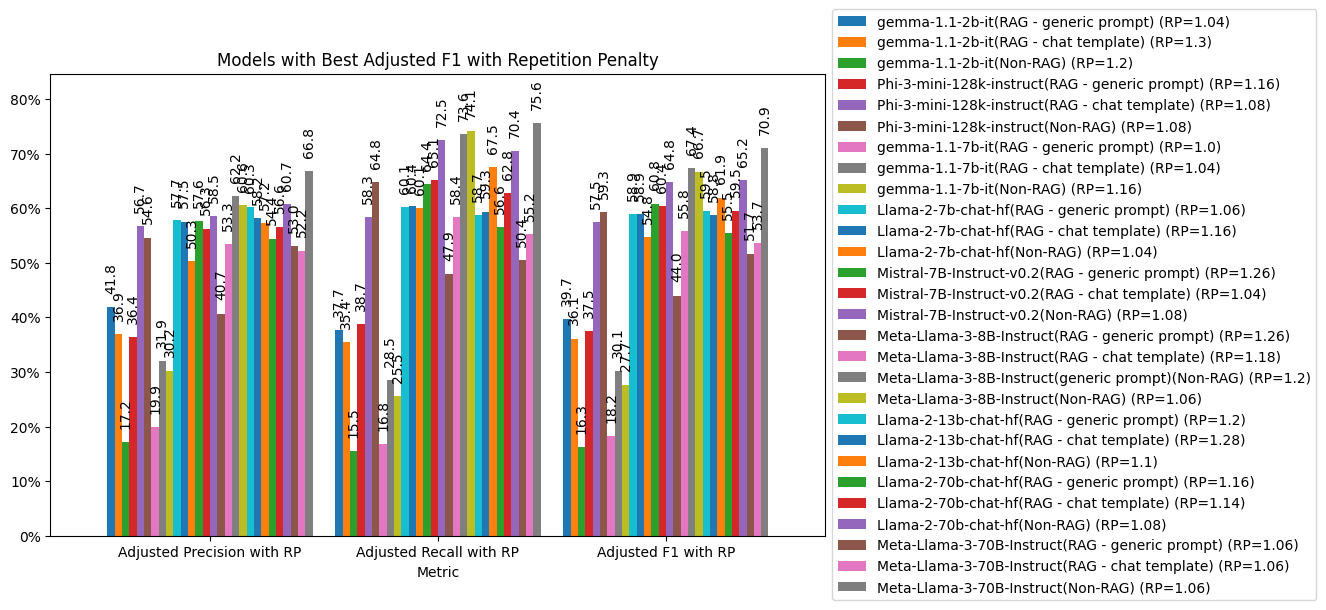

(Model                       gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)  \
 Metric                                                                        
 Adjusted Precision with RP                                         0.418413   
 Adjusted Recall with RP                                            0.377178   
 Adjusted F1 with RP                                                0.396727   
 
 Model                       gemma-1.1-2b-it(RAG - chat template) (RP=1.3)  \
 Metric                                                                      
 Adjusted Precision with RP                                       0.368693   
 Adjusted Recall with RP                                          0.354055   
 Adjusted F1 with RP                                              0.361226   
 
 Model                       gemma-1.1-2b-it(Non-RAG) (RP=1.2)  \
 Metric                                                          
 Adjusted Precision with RP                           0.171809   
 Adjuste

In [30]:
plot_best_performance(
    result,
    title="Models with Best Adjusted F1 with Repetition Penalty",
    adjusted_f1=True,
)

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0, repetition_score: 0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3612257105640478, precision: 0.3686929922759919, recall: 0.3540548997982478
newline_score: 15, repetition_score: 0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.2, best f1: 0.1628403443000877, precision: 0.1718086044812935, recall: 0.1547619069491203
newline_score: 0, repetition_score: 79
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.16, best f1: 0.3751767103992966, precision: 0.36412298061464615, recall: 0.38692257036444194
newline_score: 2950, repetition_score: 12591
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.08, best f1: 0.5747717700771251, precision: 0.5665993913424152, recall: 0.5831833484661343
newline_score: 0, rep

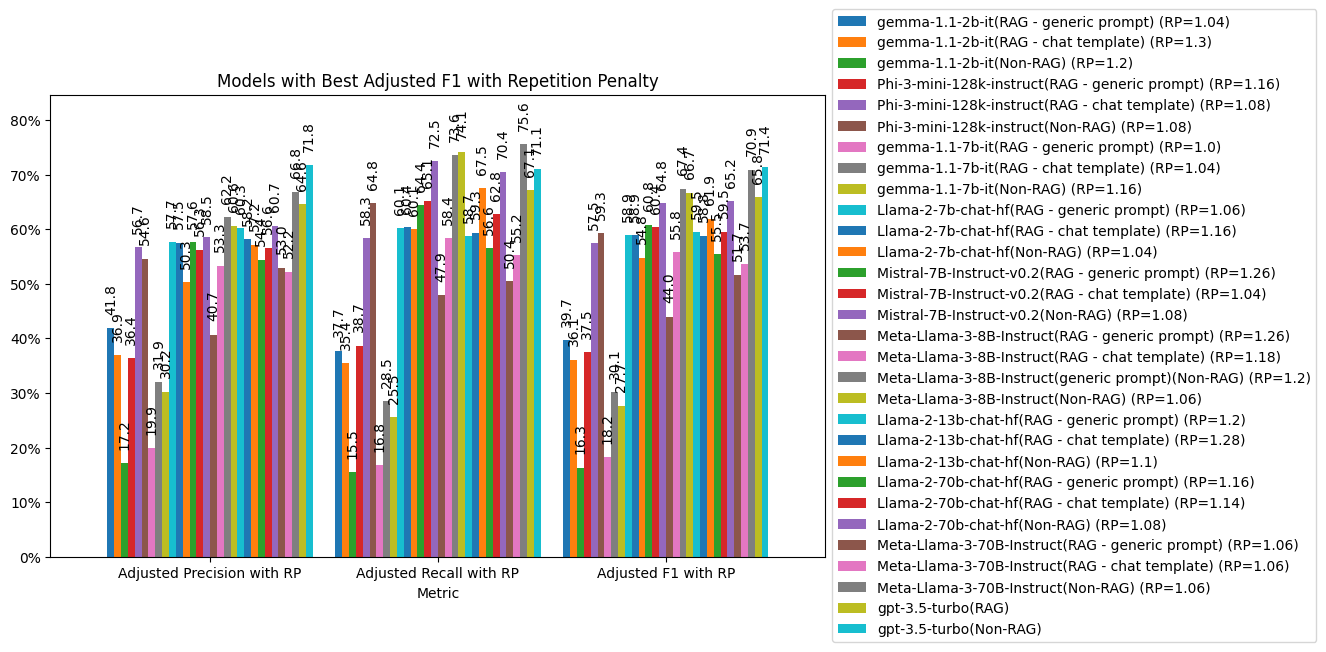

(Model                       gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)  \
 Metric                                                                        
 Adjusted Precision with RP                                         0.418413   
 Adjusted Recall with RP                                            0.377178   
 Adjusted F1 with RP                                                0.396727   
 
 Model                       gemma-1.1-2b-it(RAG - chat template) (RP=1.3)  \
 Metric                                                                      
 Adjusted Precision with RP                                       0.368693   
 Adjusted Recall with RP                                          0.354055   
 Adjusted F1 with RP                                              0.361226   
 
 Model                       gemma-1.1-2b-it(Non-RAG) (RP=1.2)  \
 Metric                                                          
 Adjusted Precision with RP                           0.171809   
 Adjuste

In [31]:
plot_best_performance(
    result,
    title="Models with Best Adjusted F1 with Repetition Penalty",
    adjusted_f1=True,
    ref_result=ref_result,
)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def plot_repetition_scores_for_best_performance(
    result,
    models=None,
    title="Models with Best F1 Score",
    adjusted_f1=False,
):
    # Initialize lists to store the statistics
    model_names = []
    best_precision = []
    best_recall = []
    best_f1 = []
    best_repetition_penalty = []
    newline_scores = []
    repetition_scores = []

    if models is None:
        models = result.keys()
    for model in models:
        print(f"model: {model}")
        df = result[model]["df_overall"]

        # Calculate the statistics
        precision = [
            df["precision"].mean() for df in result[model]["df_list_repetition_penalty"]
        ]
        recall = [
            df["recall"].mean() for df in result[model]["df_list_repetition_penalty"]
        ]

        if adjusted_f1:
            precision, recall = adjust_perf_scores_with_repetition_penalty(
                result[model], precision, recall
            )

        # f1 = [df["f1"].mean() for df in result[model]["df_list_repetition_penalty"]]
        f1 = [2 * (p * r) / (p + r) for p, r in zip(precision, recall)]

        best_f1.append(max(f1))
        best_f1_index = f1.index(best_f1[-1])
        best_repetition_penalty.append(df["repetition_penalty"][best_f1_index])

        best_precision.append(precision[best_f1_index])
        best_recall.append(recall[best_f1_index])

        print(
            f"best repetition penalty: {best_repetition_penalty[-1]}, best f1: {best_f1[-1]}, precision: {best_precision[-1]}, recall: {best_recall[-1]}"
        )

        df = result[model]["df_list_repetition_penalty"][best_f1_index]

        model_names.append(
            f"{model} (RP={best_repetition_penalty[-1]})"
        )  # Add the model name to the list

        # print mean for columns: newline_score, repetition_score
        print(
            f"newline_score: {df['newline_score'].mean()}, repetition_score: {df['repetition_score'].mean()}"
        )
        newline_scores.append(df["newline_score"].mean())
        repetition_scores.append(df["repetition_score"].mean())

    # Create a DataFrame with the statistics
    data = pd.DataFrame(
        {
            "Model": model_names,
            "Newline Score": newline_scores,
            "Repetition Score": repetition_scores,
        }
    )

    # Melt the DataFrame to a long format
    data_melted = data.melt(id_vars="Model", var_name="Metric", value_name="Score")

    # Pivot the DataFrame to a wide format
    data_pivoted = data_melted.pivot(index="Metric", columns="Model", values="Score")

    # make sure the columns are following the order of the models
    data_pivoted = data_pivoted[model_names]

    # make sure three groups in the order of precision, recall, f1
    # data_pivoted = data_pivoted.reindex(["Precision", "Recall", "F1"])

    # Plot the statistics
    plt.figure(figsize=(10, 6))
    ax = data_pivoted.plot(kind="bar", ax=plt.gca(), width=0.9)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left")

    # Set the rotation of the x-axis labels to 0 degrees
    plt.xticks(rotation=0)

    # Format the y-axis to display as percentage
    # ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Set the y-axis limit up to 70%
    # ax.set_ylim(0, 0.7)

    # Add the values above each bar
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.3f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    plt.show()

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0.0, repetition_score: 0.0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3614589869383618, precision: 0.3689310909549005, recall: 0.3542835453262864
newline_score: 0.01488095238095238, repetition_score: 0.0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.02, best f1: 0.18288530203419476, precision: 0.19182717910396482, recall: 0.17473993381947142
newline_score: 0.0, repetition_score: 51.669642857142854
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.12, best f1: 0.5615412317702367, precision: 0.5485160064319471, recall: 0.5752001057206155
newline_score: 3.3432539682539684, repetition_score: 31.592261904761905
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.1, best f1: 0.5758986278564371, precision:

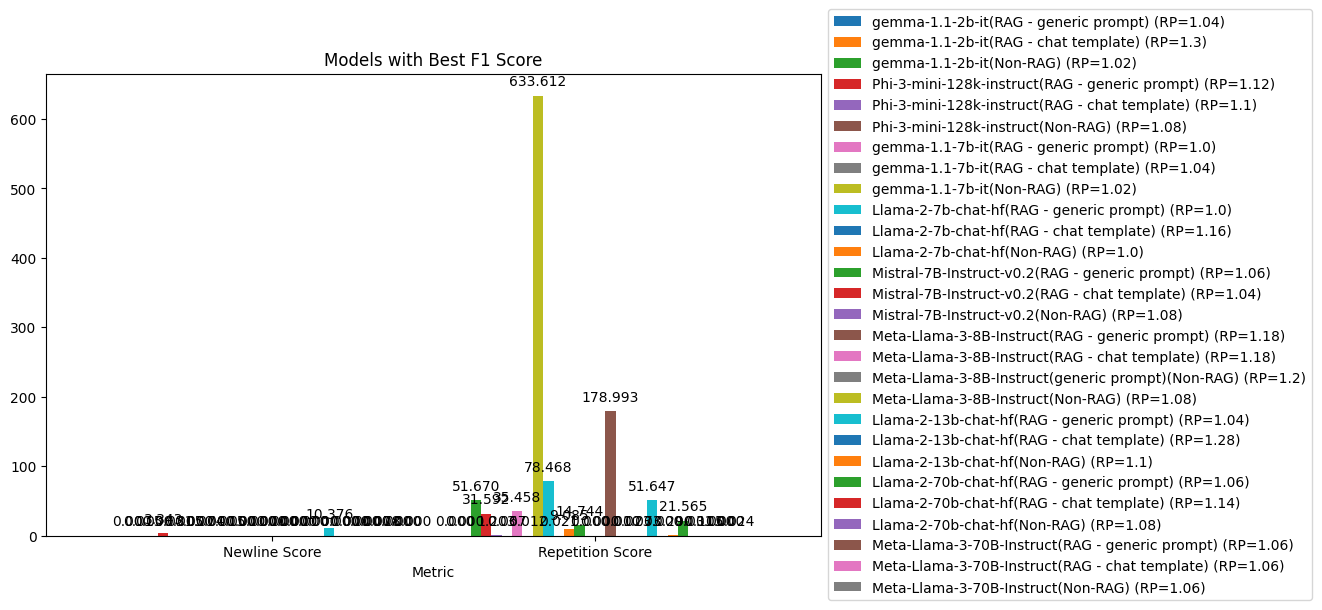

In [33]:
plot_repetition_scores_for_best_performance(result)

model: gemma-1.1-2b-it(RAG - generic prompt)
best repetition penalty: 1.04, best f1: 0.3967269877574341, precision: 0.41841340702947843, recall: 0.377177814413411
newline_score: 0.0, repetition_score: 0.0
model: gemma-1.1-2b-it(RAG - chat template)
best repetition penalty: 1.3, best f1: 0.3612257105640478, precision: 0.3686929922759919, recall: 0.3540548997982478
newline_score: 0.01488095238095238, repetition_score: 0.0
model: gemma-1.1-2b-it(Non-RAG)
best repetition penalty: 1.2, best f1: 0.1628403443000877, precision: 0.1718086044812935, recall: 0.1547619069491203
newline_score: 0.0, repetition_score: 0.07837301587301587
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
best repetition penalty: 1.16, best f1: 0.3751767103992966, precision: 0.36412298061464615, recall: 0.38692257036444194
newline_score: 2.9265873015873014, repetition_score: 12.491071428571429
model: Phi-3-mini-128k-instruct(RAG - chat template)
best repetition penalty: 1.08, best f1: 0.5747717700771251, precision:

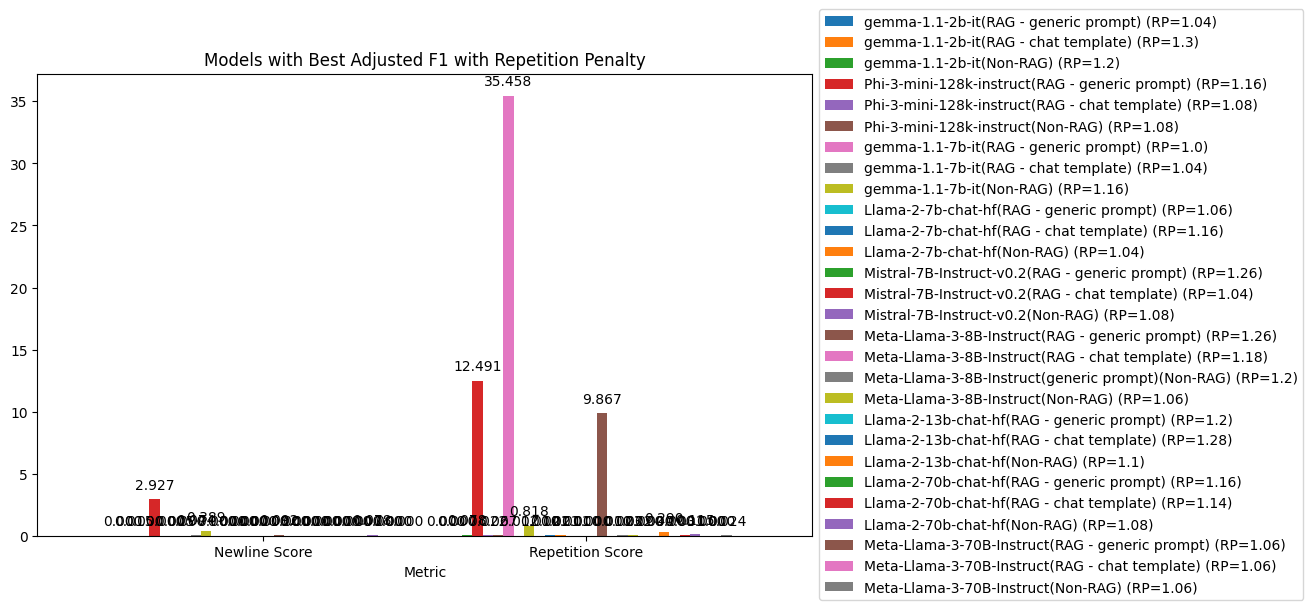

In [34]:
plot_repetition_scores_for_best_performance(
    result,
    title="Models with Best Adjusted F1 with Repetition Penalty",
    adjusted_f1=True,
)

model: gemma-1.1-2b-it(RAG - generic prompt)


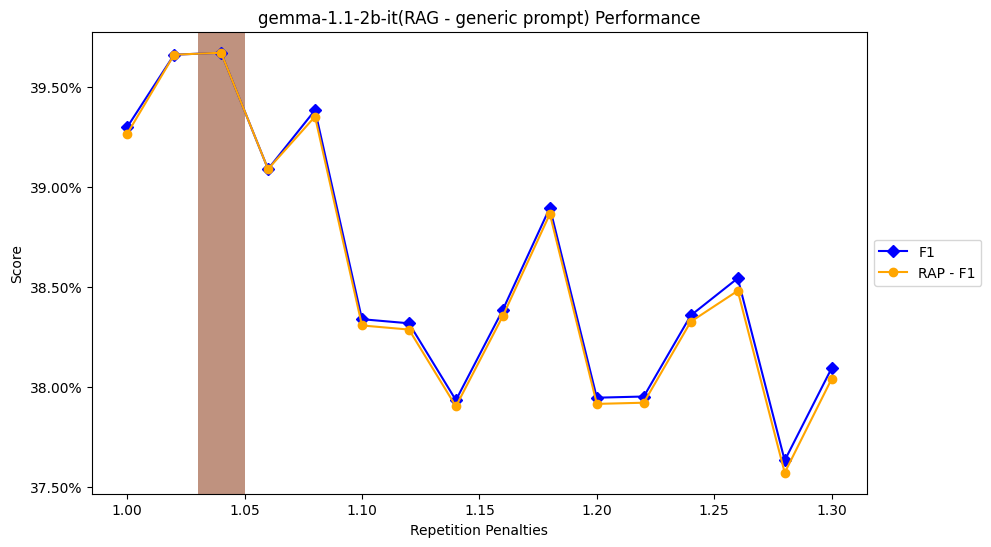

model: gemma-1.1-2b-it(RAG - chat template)


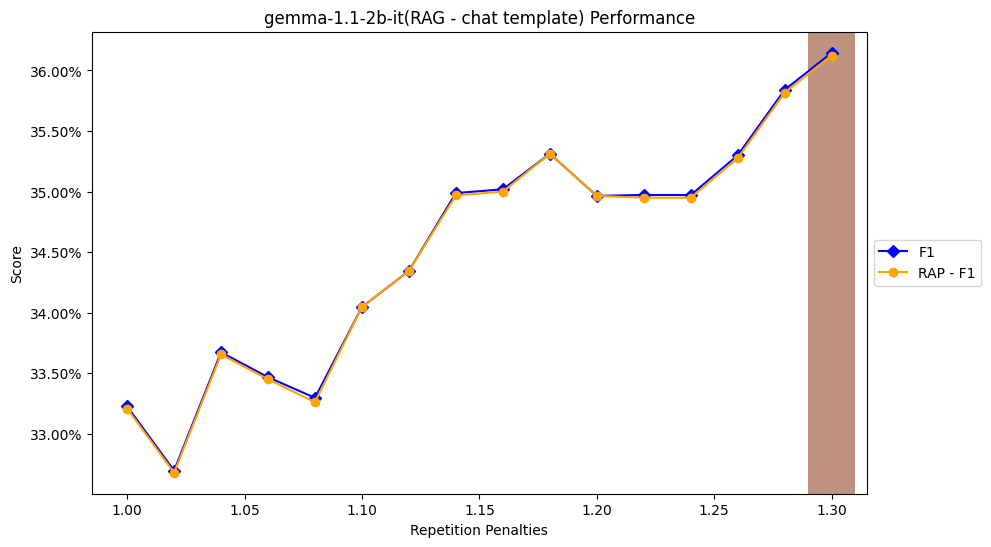

model: gemma-1.1-2b-it(Non-RAG)


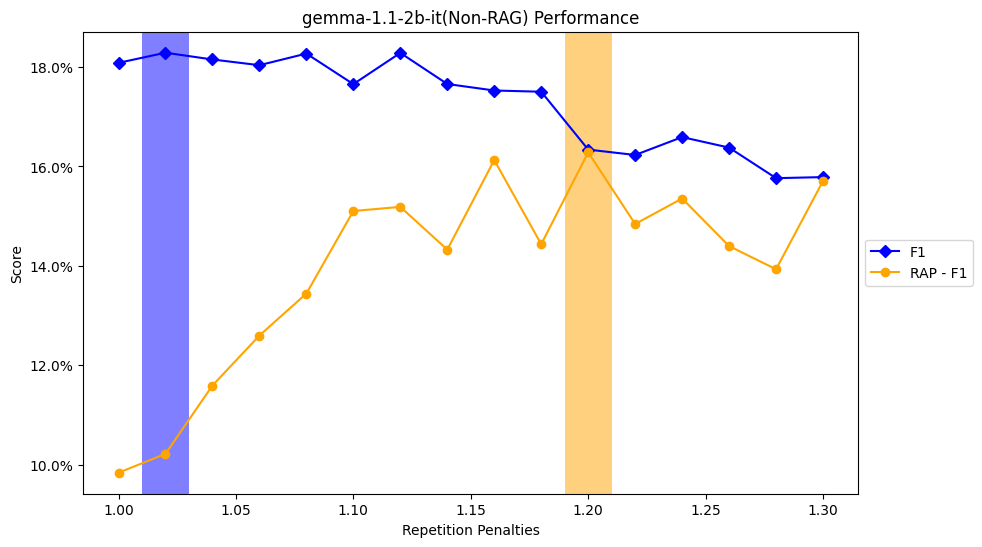

model: Phi-3-mini-128k-instruct(RAG - generic prompt)


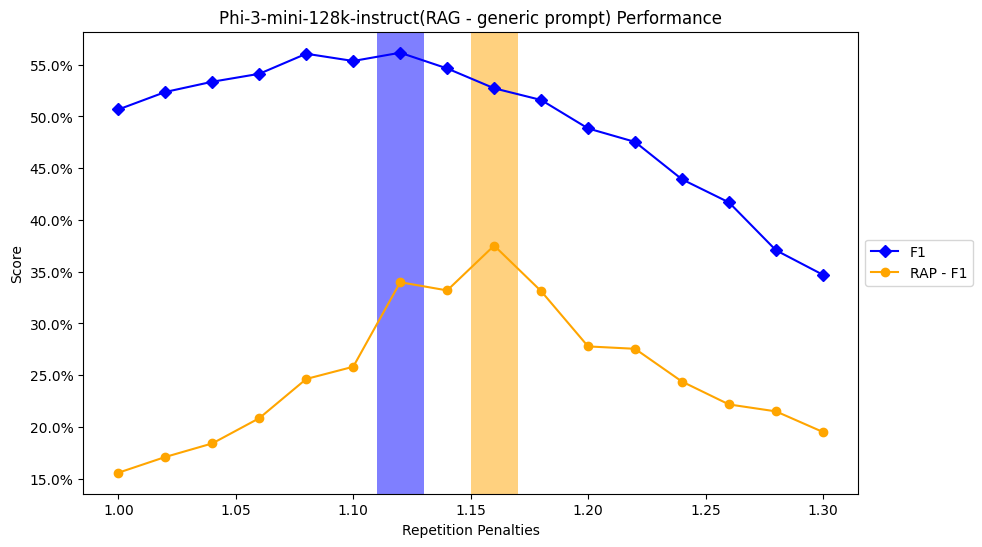

model: Phi-3-mini-128k-instruct(RAG - chat template)


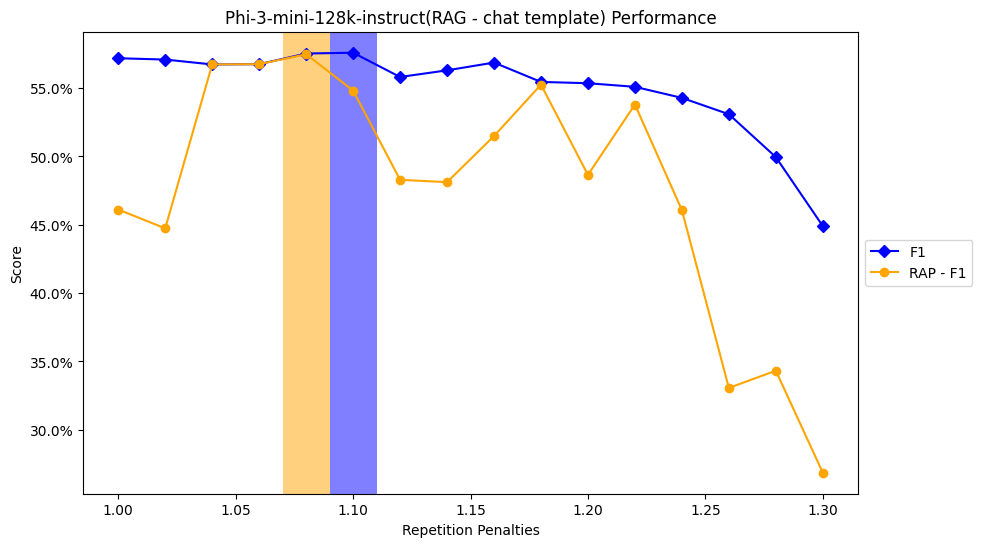

model: Phi-3-mini-128k-instruct(Non-RAG)


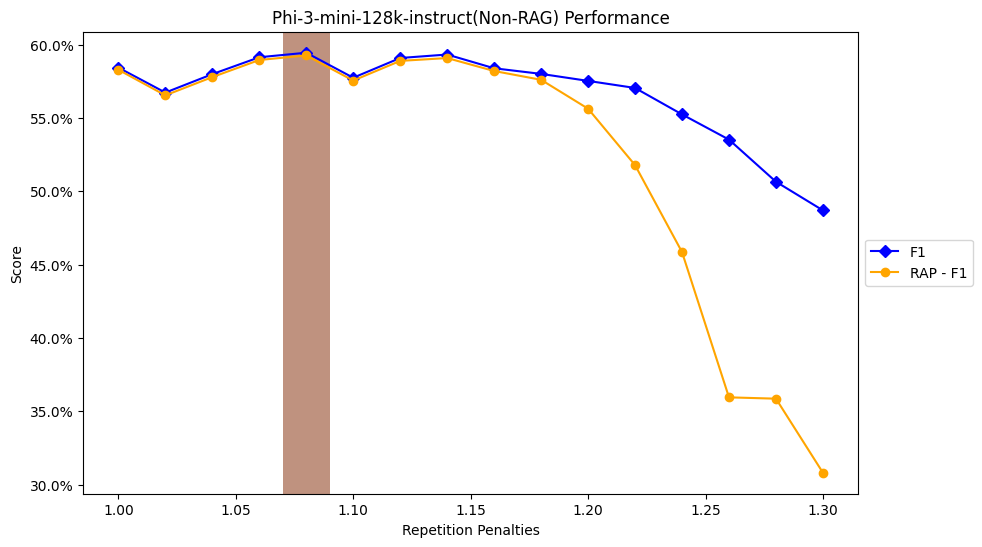

model: gemma-1.1-7b-it(RAG - generic prompt)


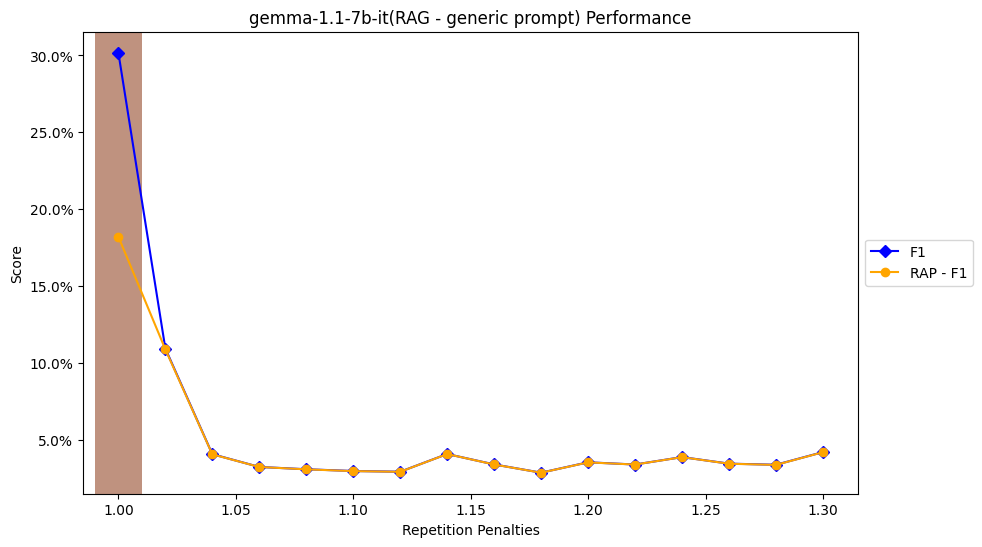

model: gemma-1.1-7b-it(RAG - chat template)


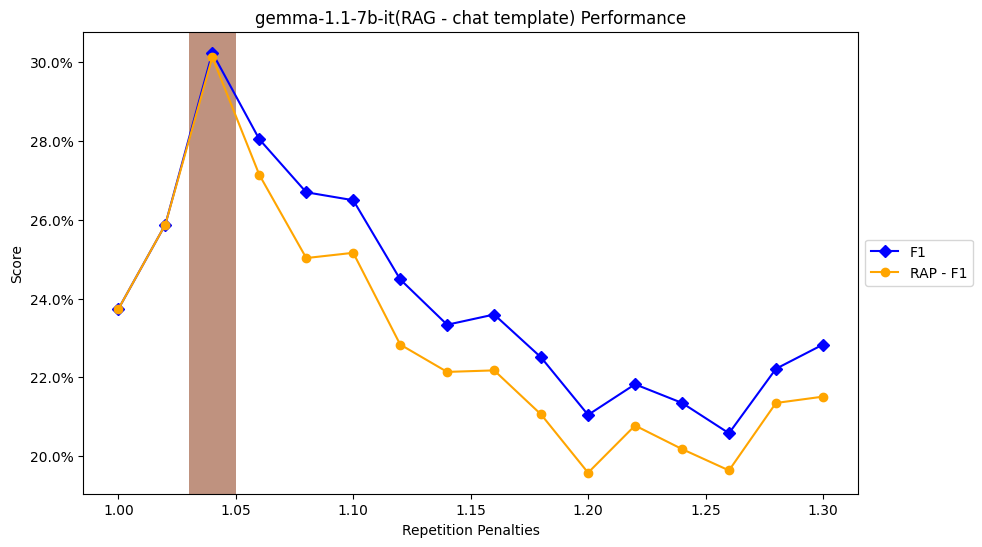

model: gemma-1.1-7b-it(Non-RAG)


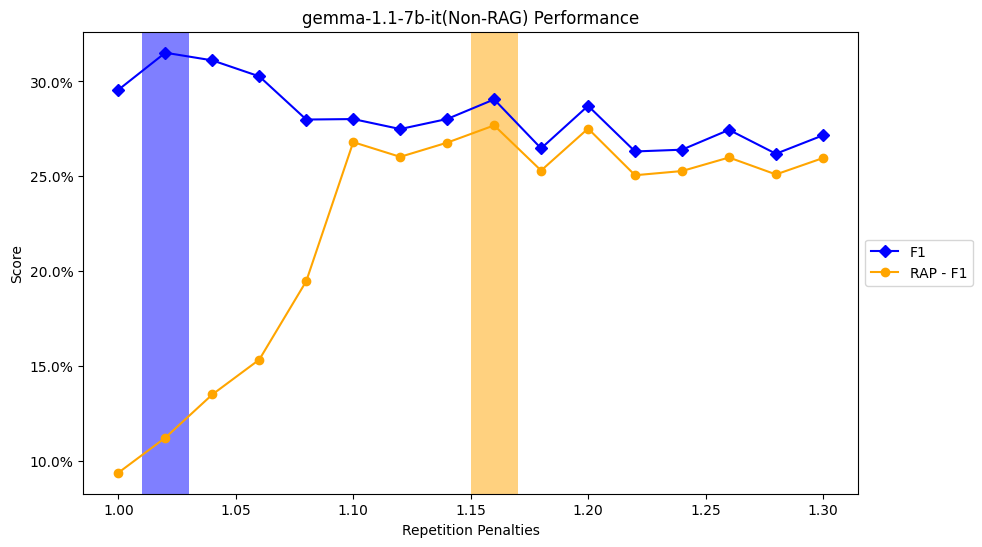

model: Llama-2-7b-chat-hf(RAG - generic prompt)


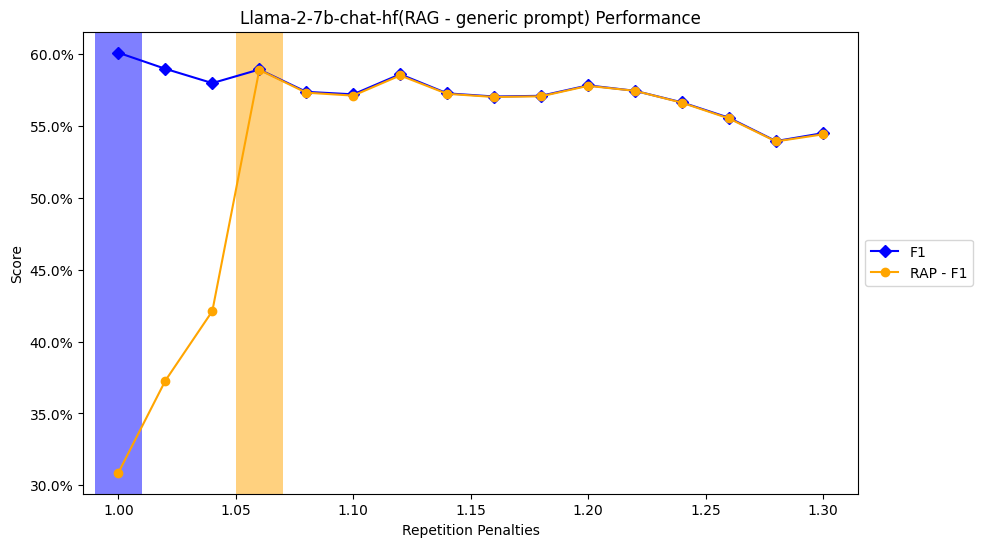

model: Llama-2-7b-chat-hf(RAG - chat template)


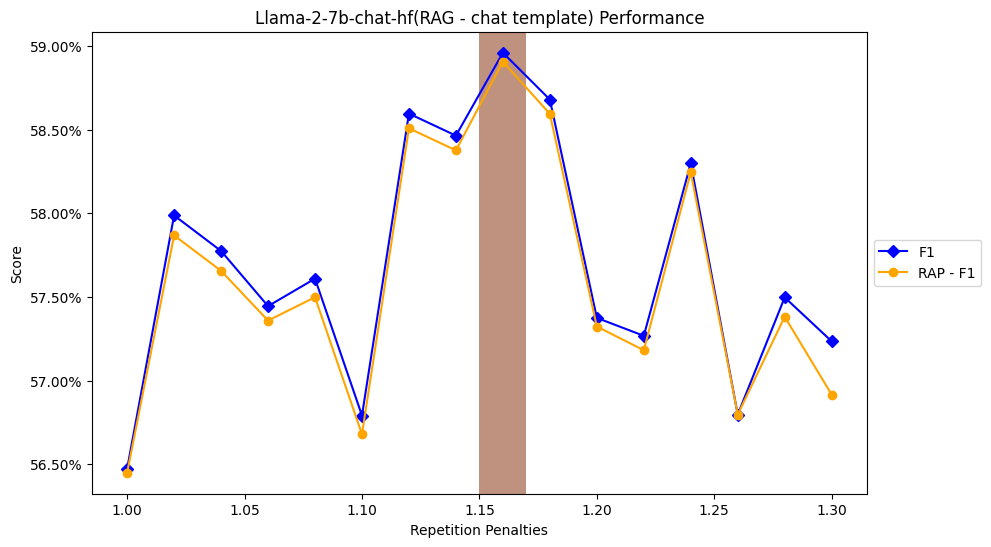

model: Llama-2-7b-chat-hf(Non-RAG)


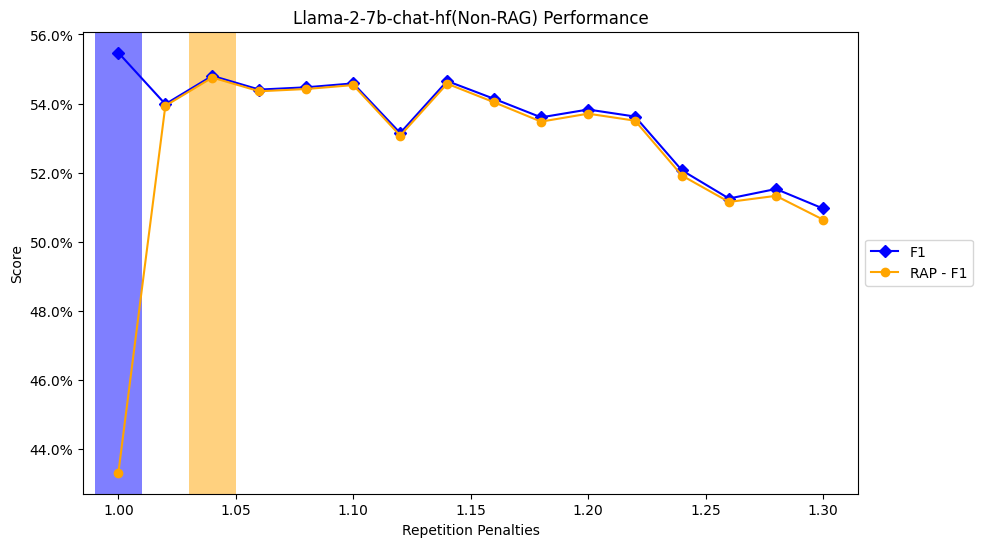

model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)


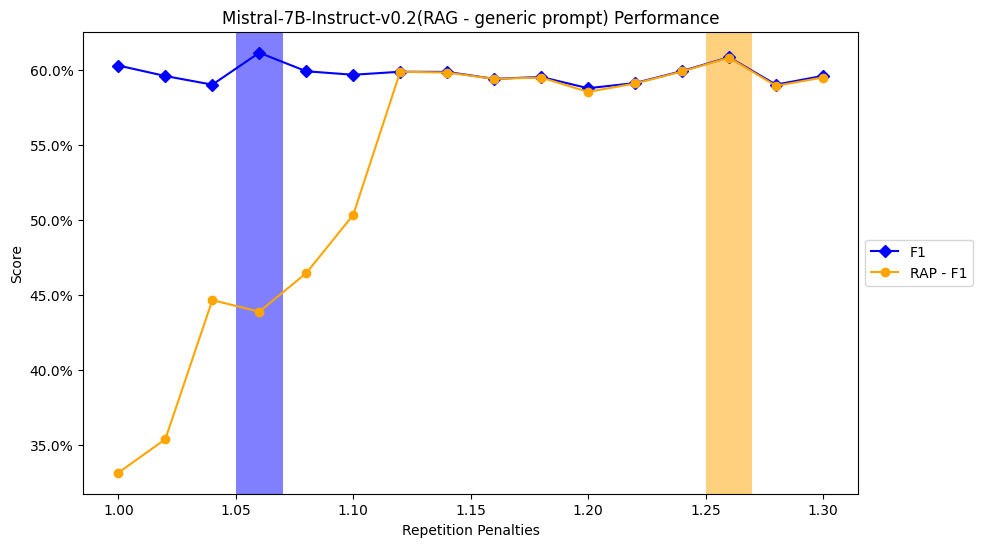

model: Mistral-7B-Instruct-v0.2(RAG - chat template)


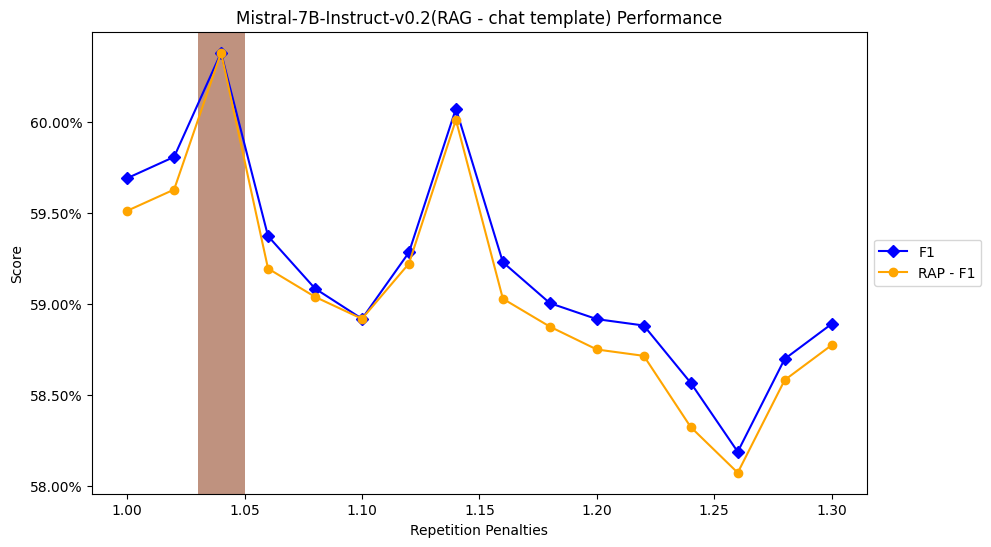

model: Mistral-7B-Instruct-v0.2(Non-RAG)


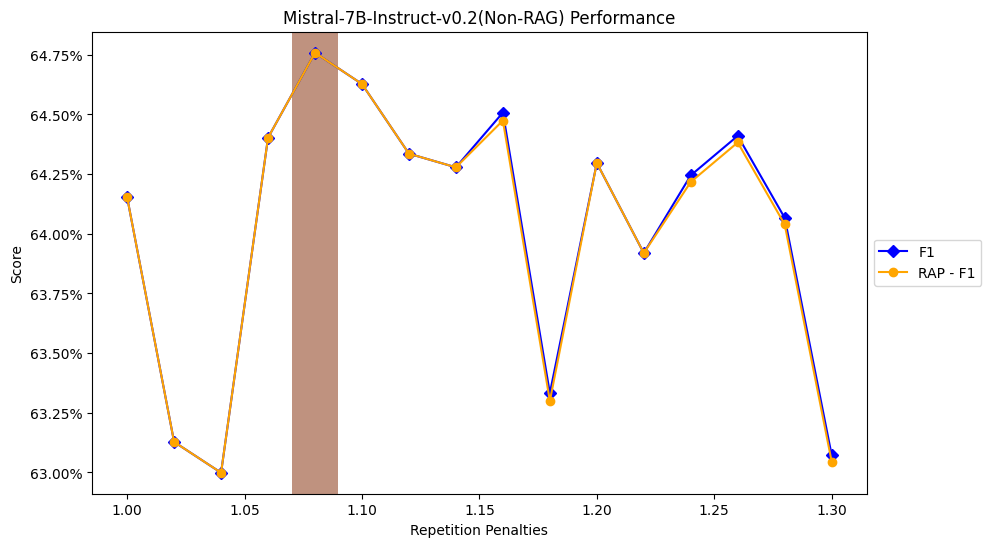

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)


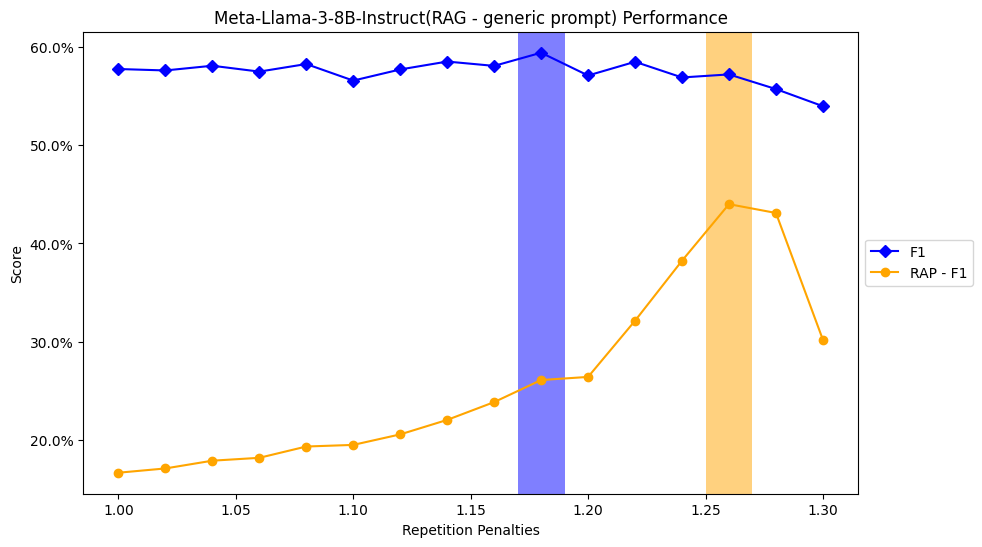

model: Meta-Llama-3-8B-Instruct(RAG - chat template)


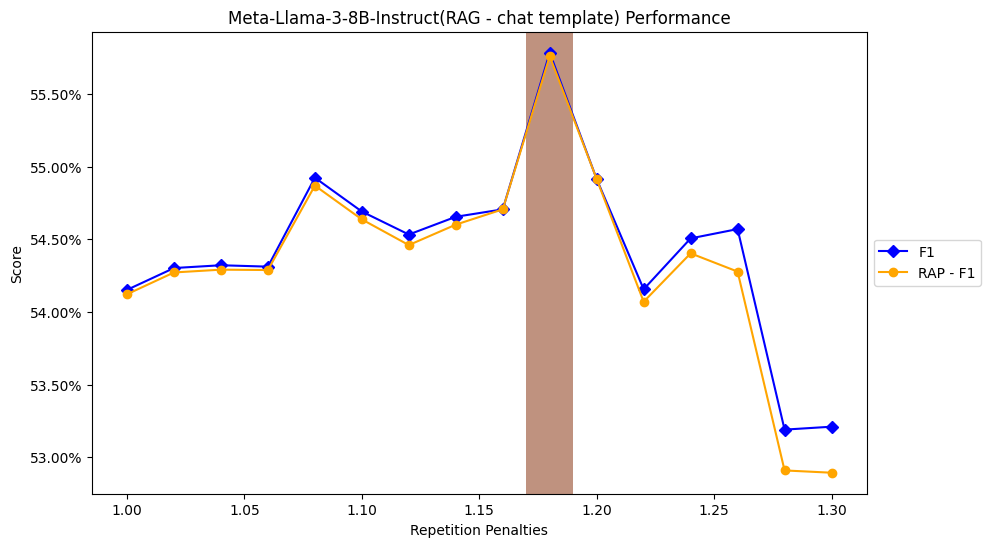

model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)


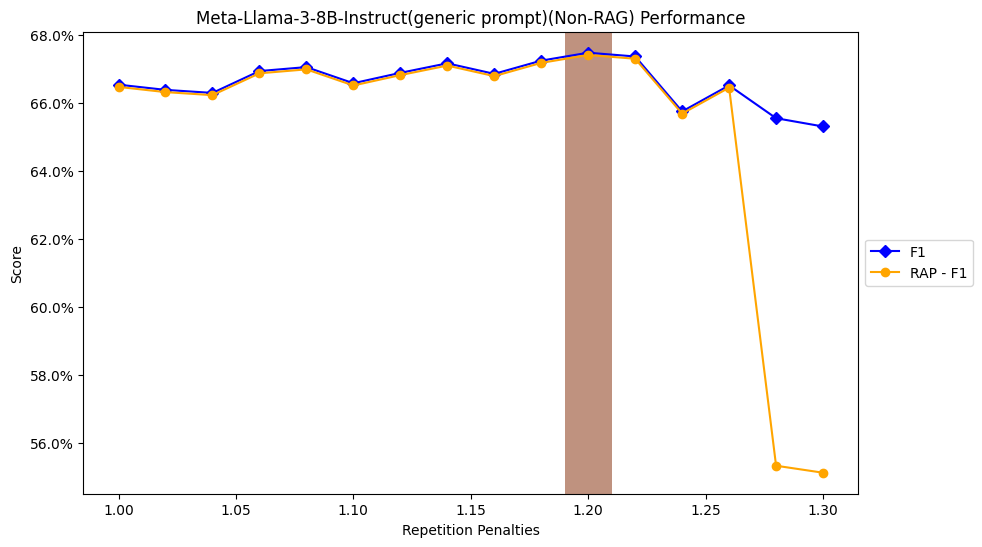

model: Meta-Llama-3-8B-Instruct(Non-RAG)


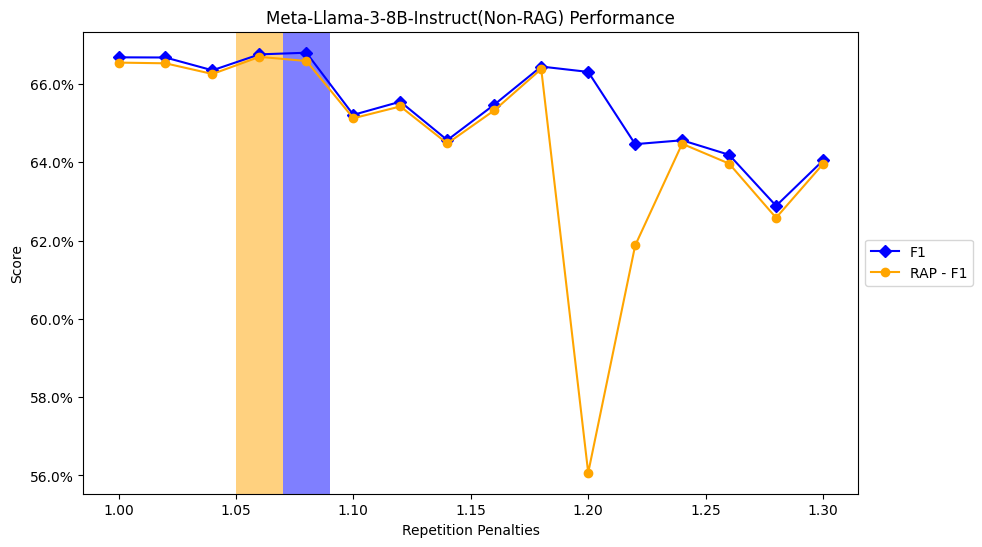

model: Llama-2-13b-chat-hf(RAG - generic prompt)


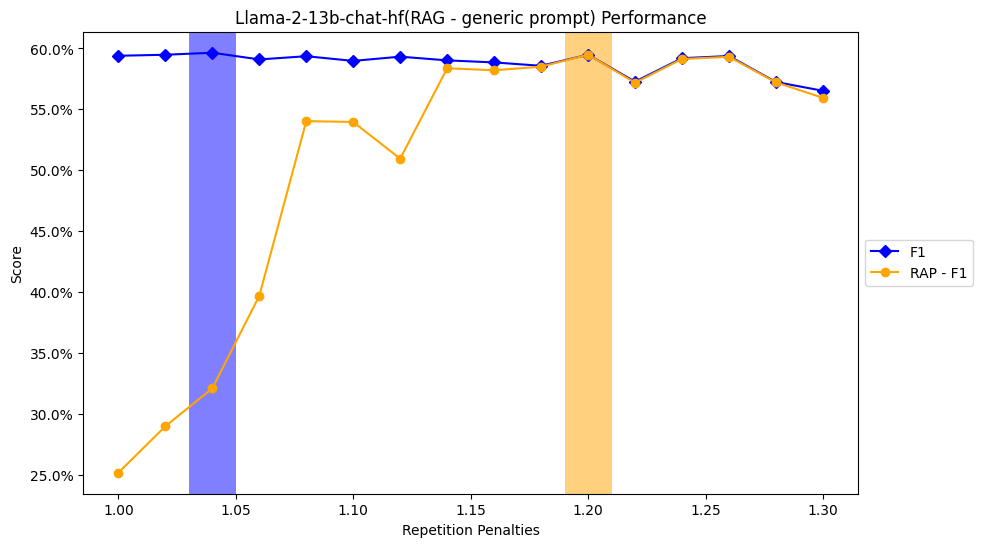

model: Llama-2-13b-chat-hf(RAG - chat template)


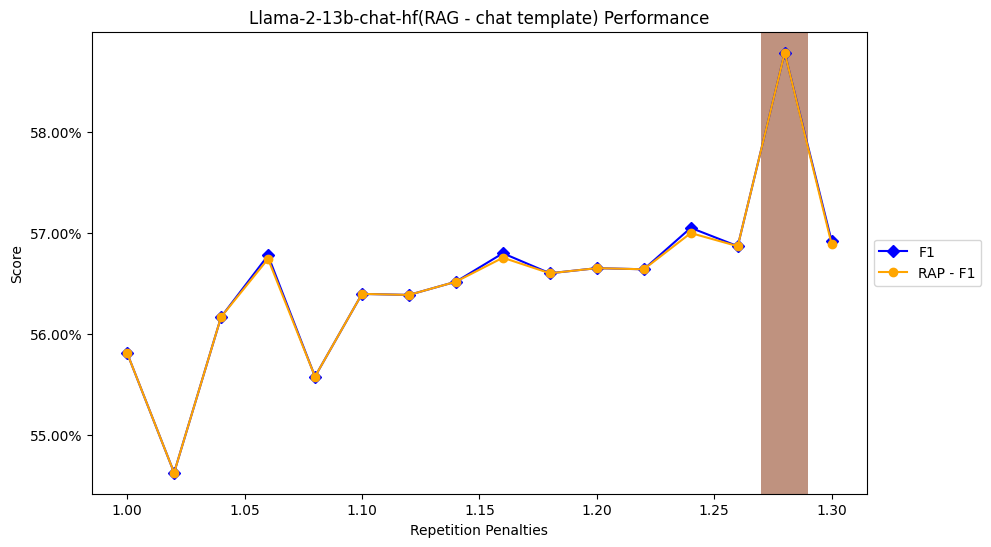

model: Llama-2-13b-chat-hf(Non-RAG)


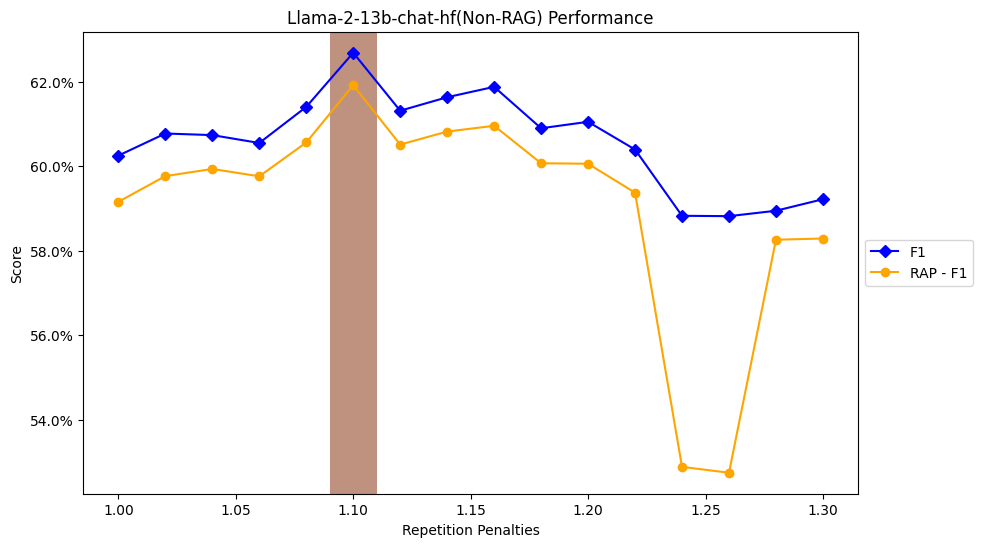

model: Llama-2-70b-chat-hf(RAG - generic prompt)


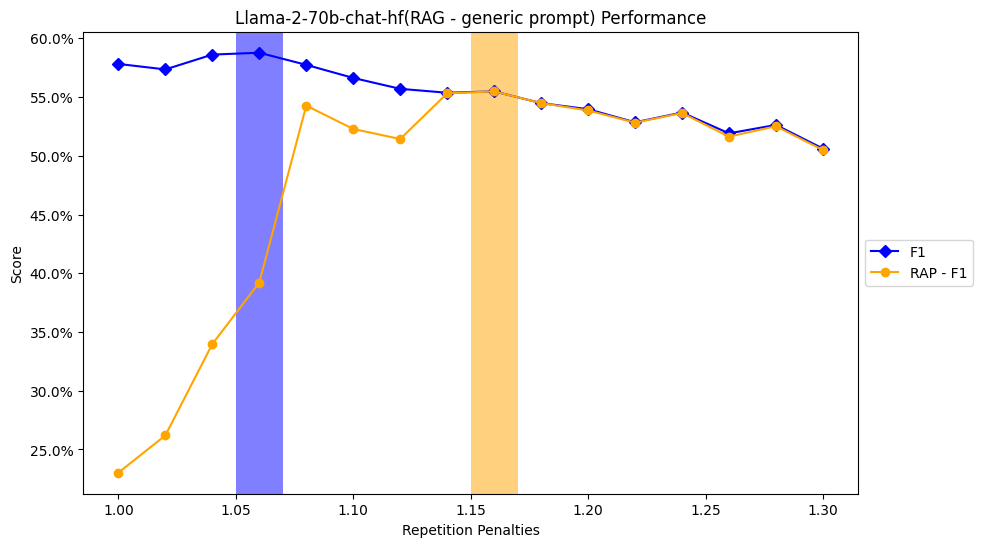

model: Llama-2-70b-chat-hf(RAG - chat template)


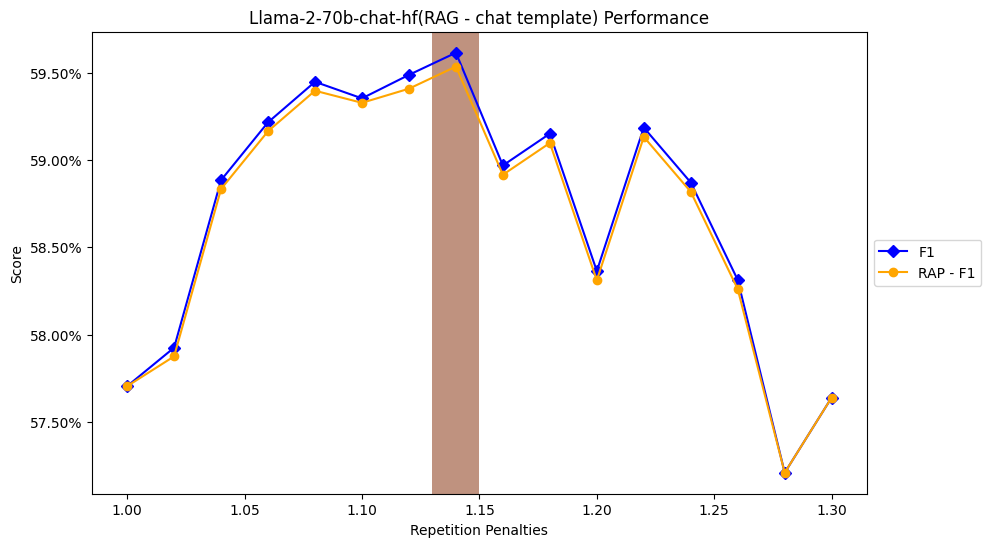

model: Llama-2-70b-chat-hf(Non-RAG)


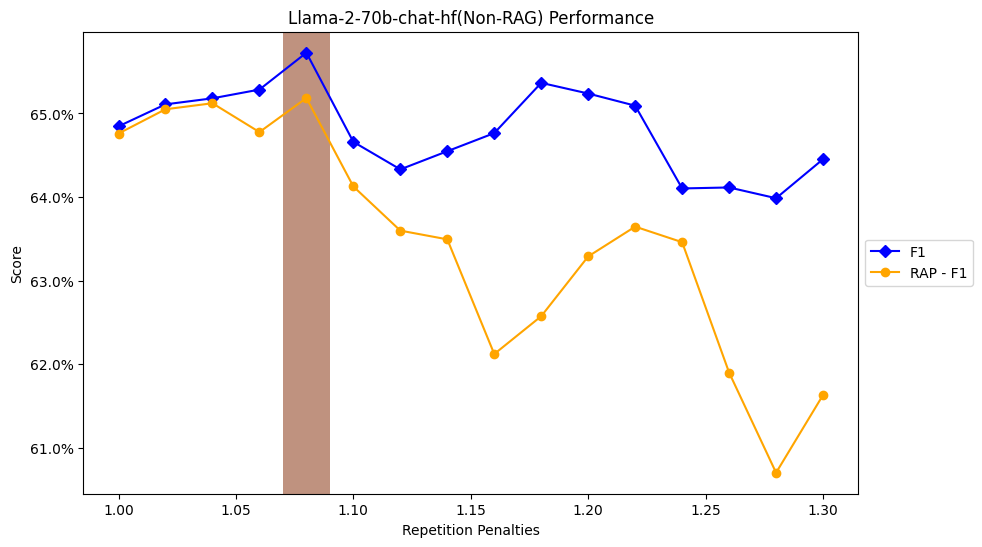

model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)


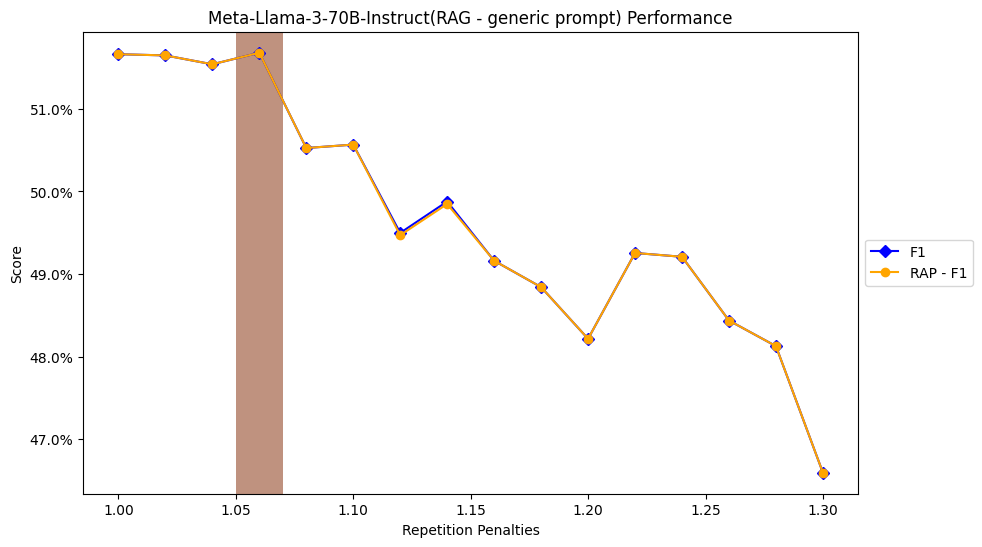

model: Meta-Llama-3-70B-Instruct(RAG - chat template)


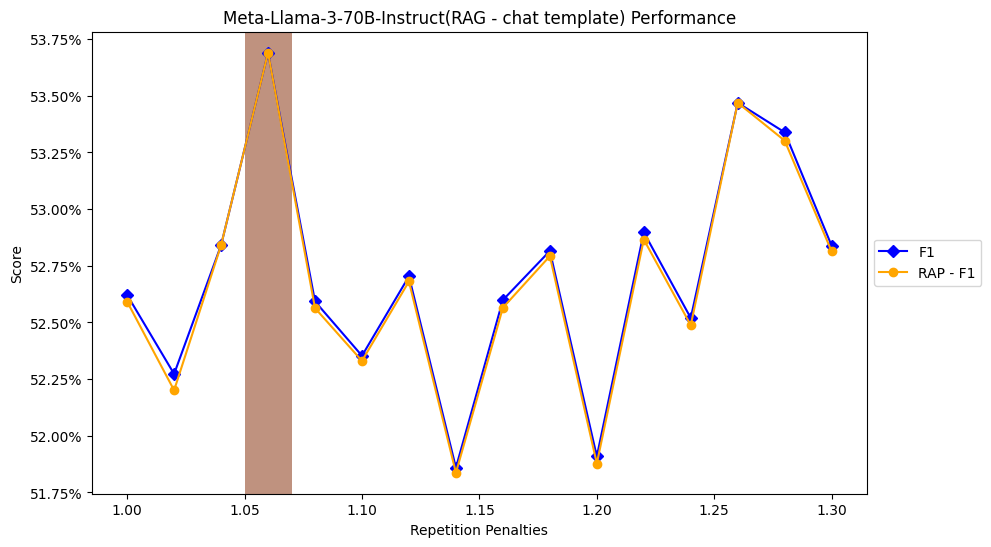

model: Meta-Llama-3-70B-Instruct(Non-RAG)


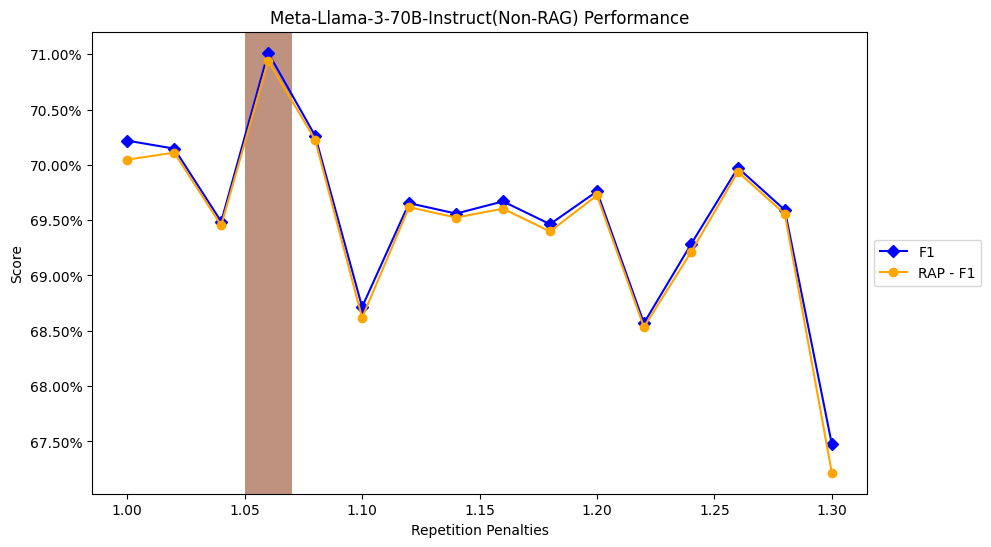

In [35]:
plot_performance_scores(result)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non

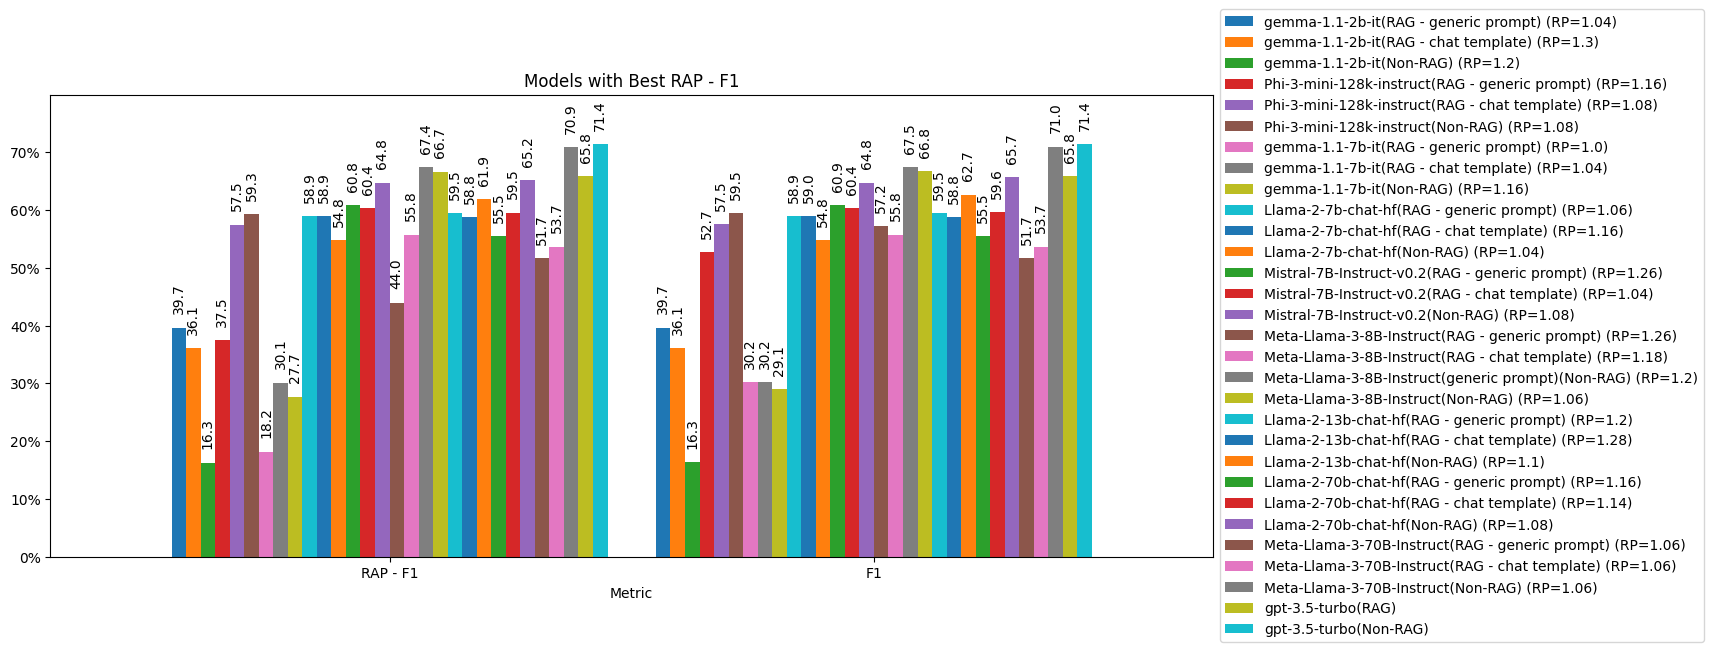

(2, 30)

In [36]:
df, best_mtr = plot_best_afrp(result, ref_result=ref_result)
len(df), len(best_mtr)

In [37]:
df = df.T
df["MTR"] = best_mtr
df

Metric                                              RAP - F1        F1  \
Model                                                                    
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)     0.396727  0.396727   
gemma-1.1-2b-it(RAG - chat template) (RP=1.3)       0.361226  0.361459   
gemma-1.1-2b-it(Non-RAG) (RP=1.2)                   0.162840  0.163392   
Phi-3-mini-128k-instruct(RAG - generic prompt) ...  0.375177  0.527174   
Phi-3-mini-128k-instruct(RAG - chat template) (...  0.574772  0.575316   
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.08)         0.592688  0.594545   
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)      0.182055  0.301777   
gemma-1.1-7b-it(RAG - chat template) (RP=1.04)      0.301317  0.302441   
gemma-1.1-7b-it(Non-RAG) (RP=1.16)                  0.276841  0.290545   
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)  0.589159  0.589413   
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.16)   0.589079  0.589612   
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)               0.547523  0.548018   
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...  0.608400  0.608688   
Mistral-7B-Instruct-v0.2(RAG - chat template) (...  0.603784  0.603784   
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.08)         0.647584  0.647584   
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...  0.439950  0.572000   
Meta-Llama-3-8B-Instruct(RAG - chat template) (...  0.557604  0.557844   
Meta-Llama-3-8B-Instruct(generic prompt)(Non-RA...  0.673985  0.674653   
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.06)         0.666931  0.667563   
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.2)  0.594868  0.594868   
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.28)  0.587844  0.587844   
Llama-2-13b-chat-hf(Non-RAG) (RP=1.1)               0.619142  0.626820   
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...  0.554825  0.554825   
Llama-2-70b-chat-hf(RAG - chat template) (RP=1.14)  0.595356  0.596150   
Llama-2-70b-chat-hf(Non-RAG) (RP=1.08)              0.651845  0.657269   
Meta-Llama-3-70B-Instruct(RAG - generic prompt)...  0.516812  0.516812   
Meta-Llama-3-70B-Instruct(RAG - chat template) ...  0.536898  0.536898   
Meta-Llama-3-70B-Instruct(Non-RAG) (RP=1.06)        0.709400  0.710132   
gpt-3.5-turbo(RAG)                                  0.658305  0.658305   
gpt-3.5-turbo(Non-RAG)                              0.714125  0.714125   

Metric                                                    MTR  
Model                                                          
gemma-1.1-2b-it(RAG - generic prompt) (RP=1.04)      0.000000  
gemma-1.1-2b-it(RAG - chat template) (RP=1.3)        0.014881  
gemma-1.1-2b-it(Non-RAG) (RP=1.2)                    0.078373  
Phi-3-mini-128k-instruct(RAG - generic prompt) ...  15.417659  
Phi-3-mini-128k-instruct(RAG - chat template) (...   0.021825  
Phi-3-mini-128k-instruct(Non-RAG) (RP=1.08)          0.072421  
gemma-1.1-7b-it(RAG - generic prompt) (RP=1.0)      35.458333  
gemma-1.1-7b-it(RAG - chat template) (RP=1.04)       0.086310  
gemma-1.1-7b-it(Non-RAG) (RP=1.16)                   1.207341  
Llama-2-7b-chat-hf(RAG - generic prompt) (RP=1.06)   0.009921  
Llama-2-7b-chat-hf(RAG - chat template) (RP=1.16)    0.020833  
Llama-2-7b-chat-hf(Non-RAG) (RP=1.04)                0.020833  
Mistral-7B-Instruct-v0.2(RAG - generic prompt) ...   0.010913  
Mistral-7B-Instruct-v0.2(RAG - chat template) (...   0.000000  
Mistral-7B-Instruct-v0.2(Non-RAG) (RP=1.08)          0.000000  
Meta-Llama-3-8B-Instruct(RAG - generic prompt) ...   9.959325  
Meta-Llama-3-8B-Instruct(RAG - chat template) (...   0.009921  
Meta-Llama-3-8B-Instruct(generic prompt)(Non-RA...   0.022817  
Meta-Llama-3-8B-Instruct(Non-RAG) (RP=1.06)          0.021825  
Llama-2-13b-chat-hf(RAG - generic prompt) (RP=1.2)   0.000000  
Llama-2-13b-chat-hf(RAG - chat template) (RP=1.28)   0.000000  
Llama-2-13b-chat-hf(Non-RAG) (RP=1.1)                0.289683  
Llama-2-70b-chat-hf(RAG - generic prompt) (RP=1...   0.000000  
Llama-2-70b-chat-hf(RAG - chat 

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)
model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)
model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)
model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)
model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)
model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)
model: Meta-Llama-3-8B-Instruct(Non-RAG)
model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non

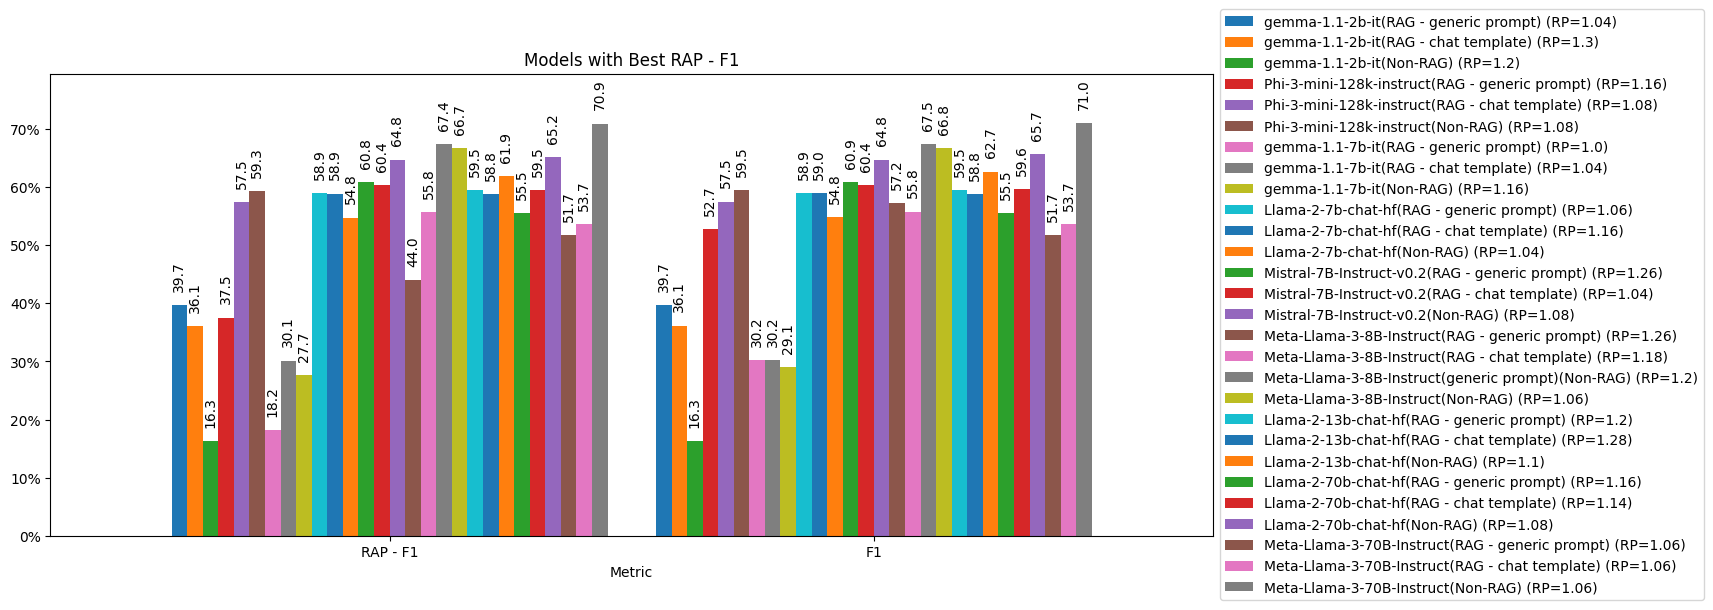

In [38]:
df = plot_best_afrp(result)

model: gemma-1.1-2b-it(RAG - generic prompt)
model: gemma-1.1-2b-it(RAG - chat template)
model: gemma-1.1-2b-it(Non-RAG)


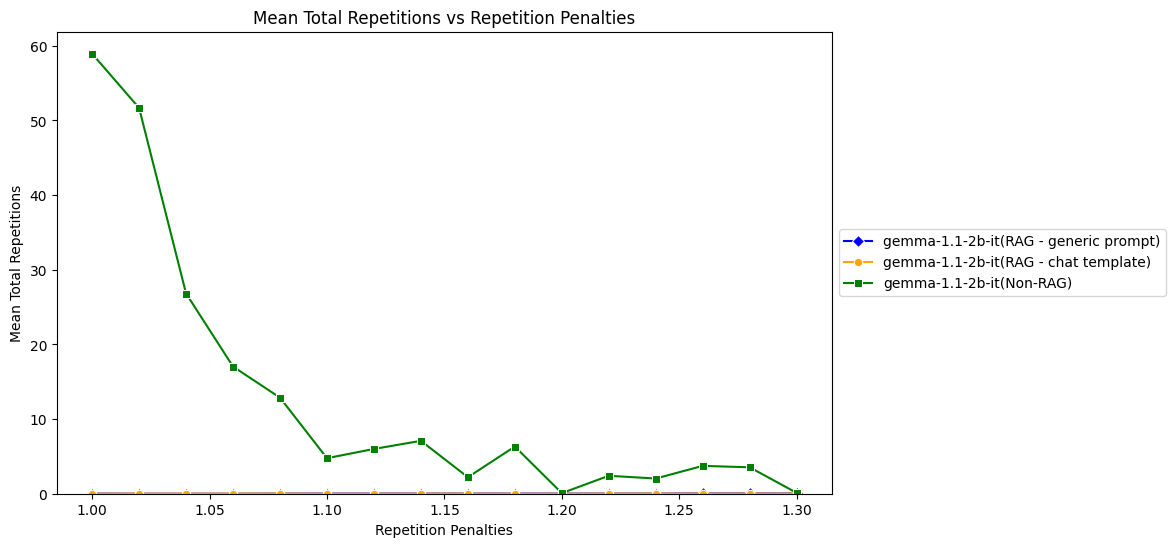

model: Phi-3-mini-128k-instruct(RAG - generic prompt)
model: Phi-3-mini-128k-instruct(RAG - chat template)
model: Phi-3-mini-128k-instruct(Non-RAG)


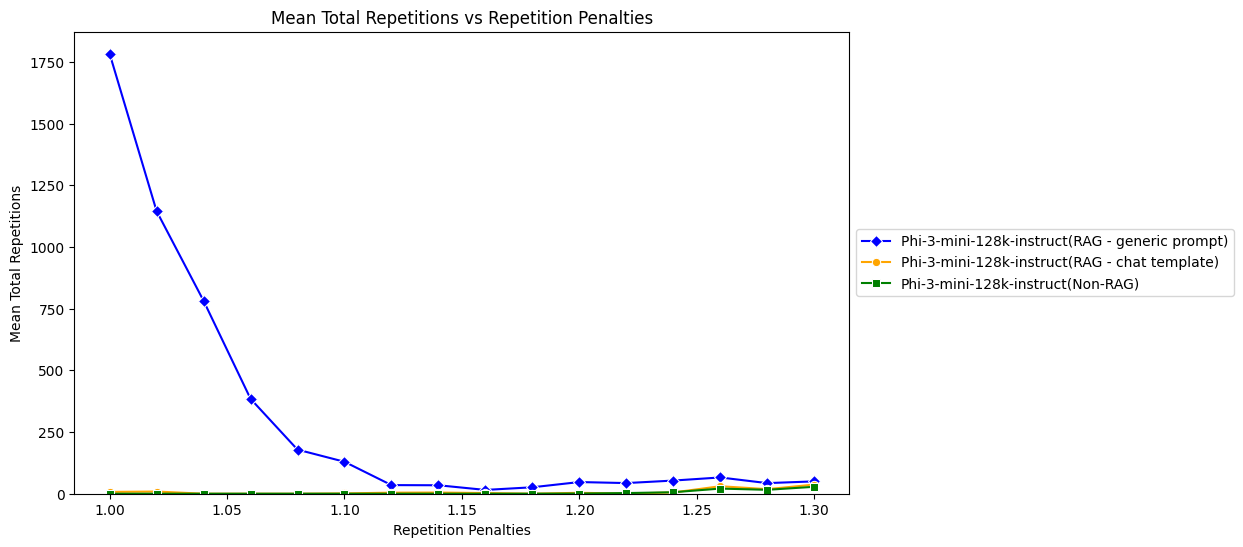

model: gemma-1.1-7b-it(RAG - generic prompt)
model: gemma-1.1-7b-it(RAG - chat template)
model: gemma-1.1-7b-it(Non-RAG)


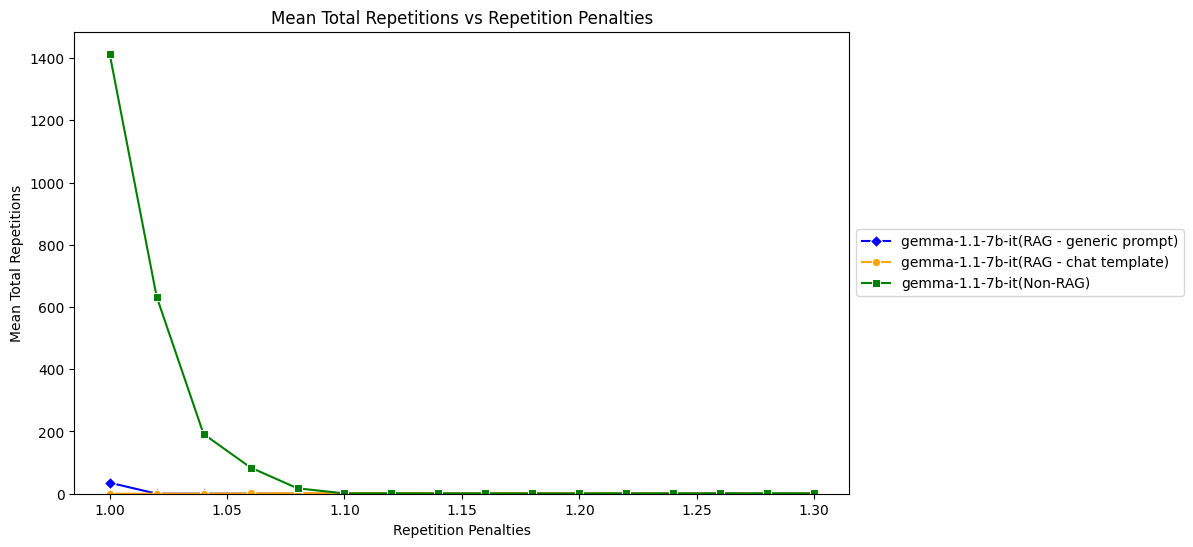

model: Llama-2-7b-chat-hf(RAG - generic prompt)
model: Llama-2-7b-chat-hf(RAG - chat template)
model: Llama-2-7b-chat-hf(Non-RAG)


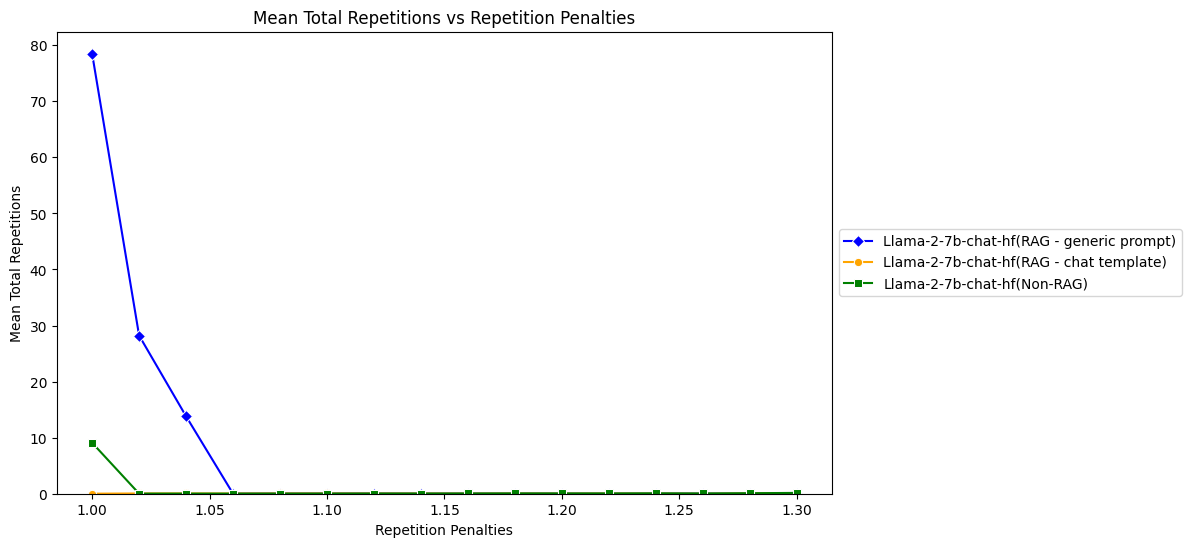

model: Mistral-7B-Instruct-v0.2(RAG - generic prompt)
model: Mistral-7B-Instruct-v0.2(RAG - chat template)
model: Mistral-7B-Instruct-v0.2(Non-RAG)


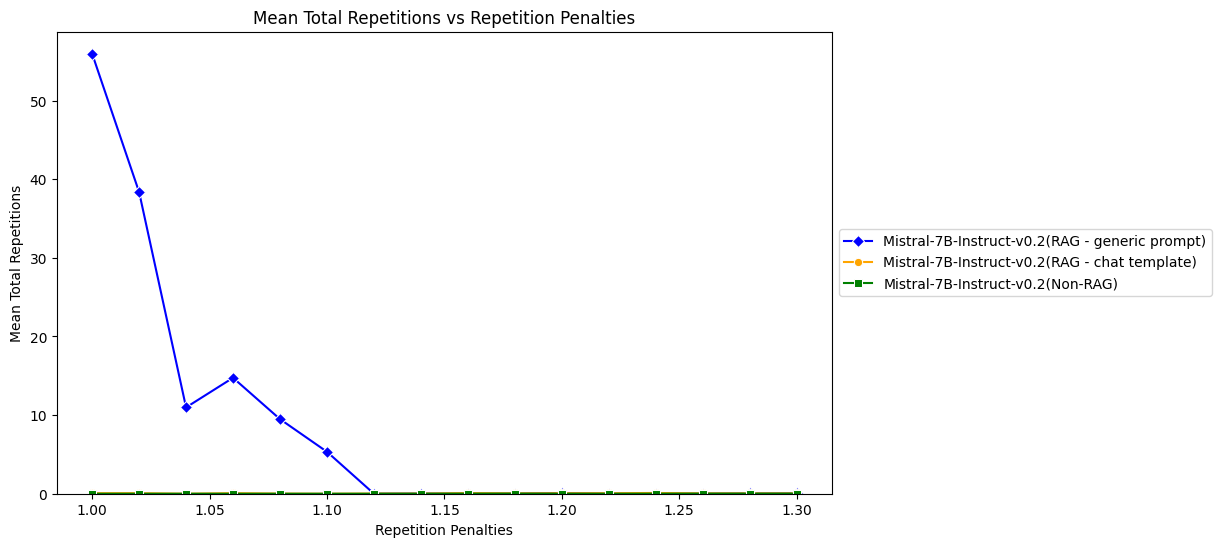

model: Meta-Llama-3-8B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-8B-Instruct(RAG - chat template)
model: Meta-Llama-3-8B-Instruct(generic prompt)(Non-RAG)
model: Meta-Llama-3-8B-Instruct(Non-RAG)


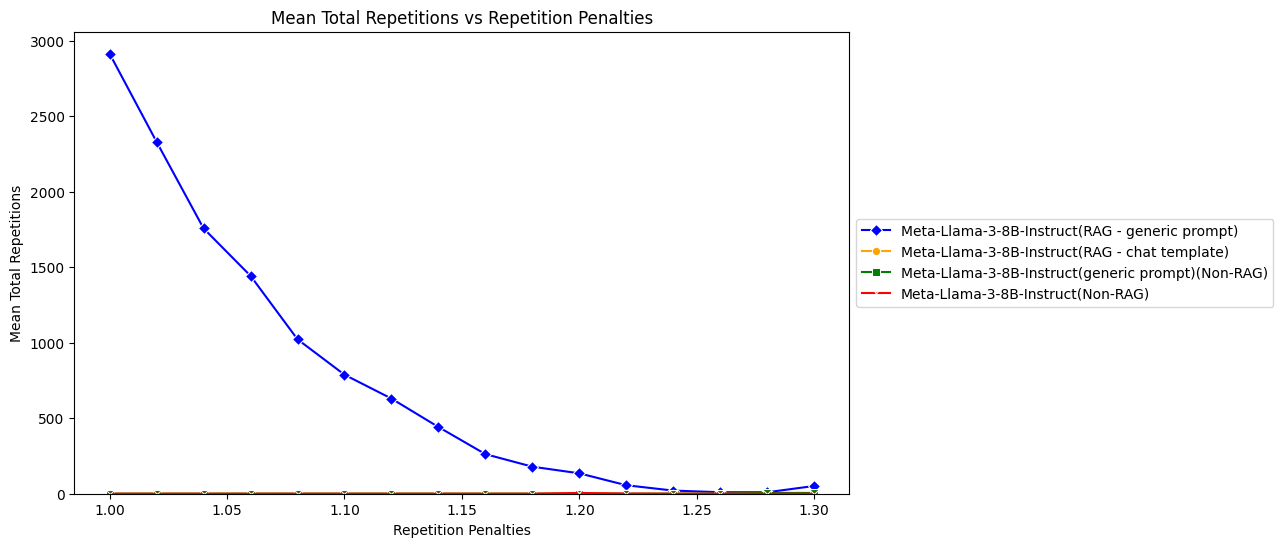

model: Llama-2-13b-chat-hf(RAG - generic prompt)
model: Llama-2-13b-chat-hf(RAG - chat template)
model: Llama-2-13b-chat-hf(Non-RAG)


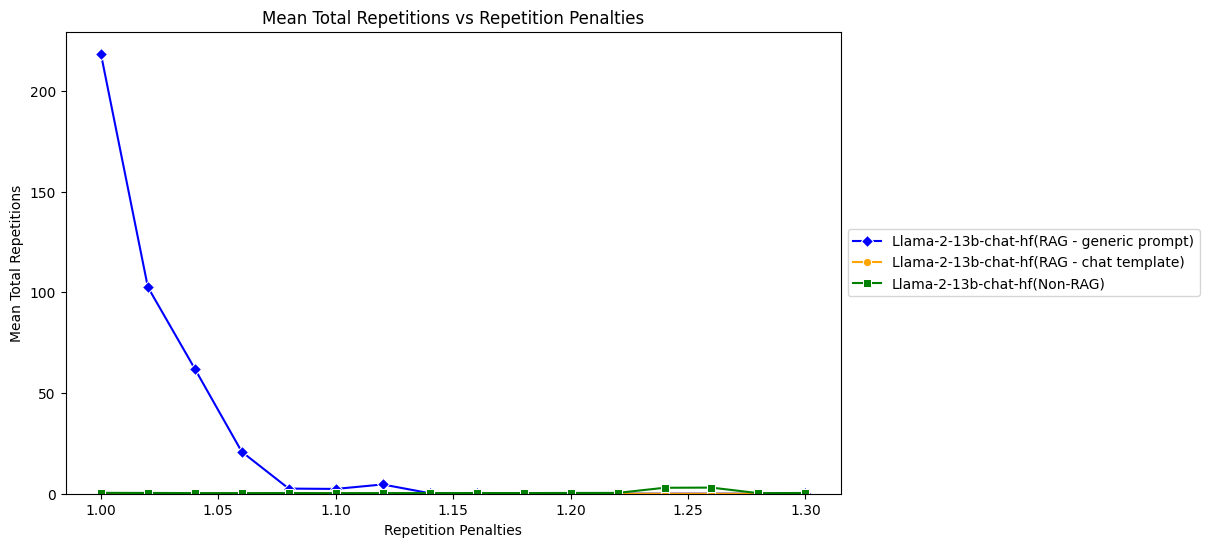

model: Llama-2-70b-chat-hf(RAG - generic prompt)
model: Llama-2-70b-chat-hf(RAG - chat template)
model: Llama-2-70b-chat-hf(Non-RAG)


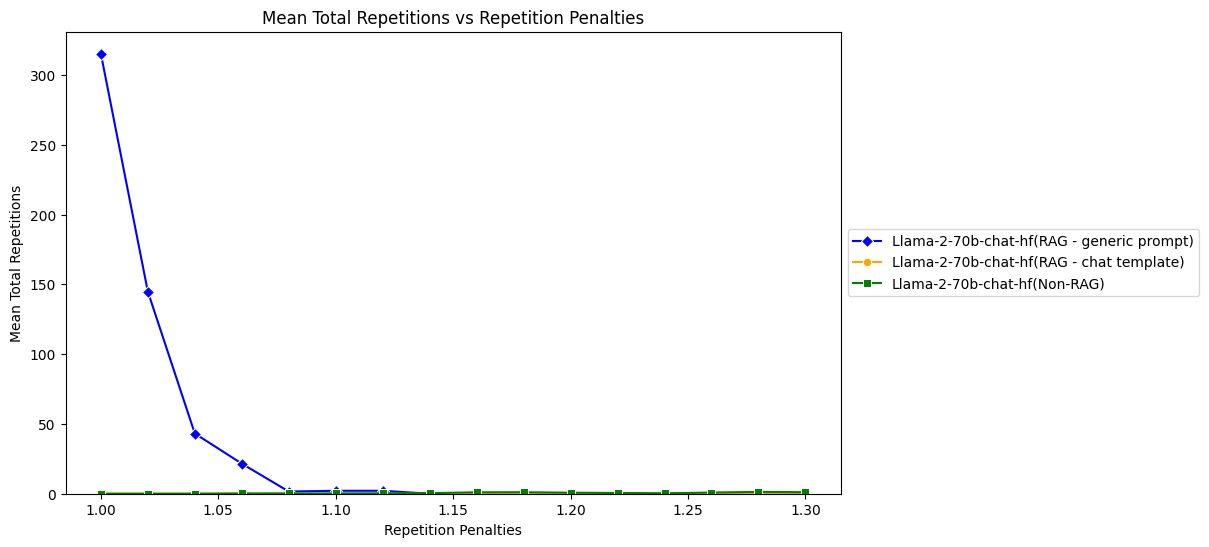

model: Meta-Llama-3-70B-Instruct(RAG - generic prompt)
model: Meta-Llama-3-70B-Instruct(RAG - chat template)
model: Meta-Llama-3-70B-Instruct(Non-RAG)


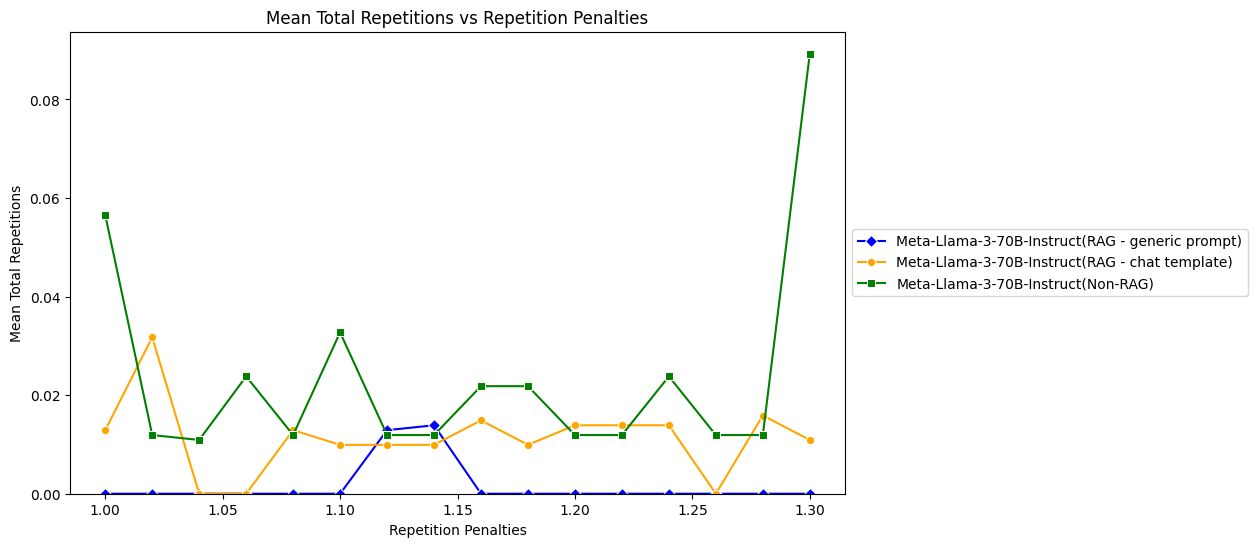

In [39]:
for model_prefix in all_open_source_models:
    plot_repetition_factors_by_group(result, model_prefix)